# **Late Delivery Risk**

## **Overview**

📦 **Task Overview**

This dataset contains over 180,000 transactions across three years from a global supply chain, including features about orders, products, shipping, delivery, and financials. Our primary task is to **predict Late Delivery Risk**, i.e., whether a particular order is likely to be delivered late.

🔍 **Importance of the Task**

Predicting late deliveries is crucial for supply chain efficiency, cost reduction, and customer satisfaction. By identifying orders at risk of delay, companies can take proactive actions, optimize logistics, improve resource allocation, and enhance service reliability.

🧾 **Key Features**

- Order Details: Order ID, product ID, quantity, price, discount, profit margins.
- Customer Information: Customer ID, location, contact details.
- Shipping Information: Shipping mode, shipping date, delivery date, shipping cost.
- Product Details: Category, brand, specifications.
- Financial Metrics: Total sales, total profit, profit margins.
- Delivery Performance: Delivery status (on-time or late), delivery delay duration.

These features allow us to analyze factors contributing to delivery delays and build models to predict the risk of late deliveries, enabling better decision-making and operational improvements.

## **Import Libraries and Download Data**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from matplotlib.ticker import FuncFormatter
import plotly.express as px

import missingno as msno

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

import shap

!pip install lime
import lime
import lime.lime_tabular

!pip install dice-ml
import dice_ml
from dice_ml import Dice

import warnings
warnings.filterwarnings('ignore') # ignore warnings
pd.set_option('display.max_columns', None) # to display the total number columns present in the dataset

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=6ea712cd25f9397e517d4ff4f36e1541f2de69330b068a868c0cdad68dde7ec5
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download shashwatwork/dataco-smart-supply-chain-for-big-data-analysis
!unzip /content/dataco-smart-supply-chain-for-big-data-analysis.zip

Dataset URL: https://www.kaggle.com/datasets/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis
License(s): CC0-1.0
  0% 0.00/25.7M [00:00<?, ?B/s]
100% 25.7M/25.7M [00:00<00:00, 1.01GB/s]
Archive:  /content/dataco-smart-supply-chain-for-big-data-analysis.zip
  inflating: DataCoSupplyChainDataset.csv  
  inflating: DescriptionDataCoSupplyChain.csv  
  inflating: tokenized_access_logs.csv  


In [ ]:
df = pd.read_csv('/content/DataCoSupplyChainDataset.csv', encoding='ISO-8859-1')  # Load the dataset into a DataFrame

## **Exploratory Data Analysis (EDA)**

In [ ]:
df.head(5) # Display the first 5 rows of the dataset to preview the data

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  \
0                   0           73  Sporting Goods        Caguas   
1                   1           73  Sporting Goods        Caguas   
2                   0           73  Sporting Goods      San Jose   
3                   0           73  Sporting Goods   Los Angeles   
4                   0           73  Sporting Goods        Caguas   

  Customer Country Customer Email Customer Fname  Customer Id Customer Lname  \
0      Puerto Rico      XXXXXXXXX          Cally        20755       Holloway   
1      Puerto Rico      XXXXXXXXX          Irene        19492           Luna   
2          EE. UU.      XXXXXXXXX        Gillian        19491      Maldonado   
3          EE. UU.      XXXXXXXXX           Tana        19490           Tate   
4      Puerto Rico      XXXXXXXXX           Orli        19489      Hendricks   

  Customer Password Customer Segment Customer State           Customer Street  \
0         XXXXXXXXX         Consumer             PR  5365 Noble Nectar Island   
1         XXXXXXXXX         Consumer             PR          2679 Rustic Loop   
2         XXXXXXXXX         Consumer             CA      8510 Round Bear Gate   
3         XXXXXXXXX      Home Office             CA           3200 Amber Bend   
4         XXXXXXXXX        Corporate             PR  8671 Iron Anchor Corners   

   Customer Zipcode  Department Id Department Name   Latitude   Longitude  \
0             725.0              2         Fitness  18.251453  -66.037056   
1             725.0              2         Fitness  18.279451  -66.037064   
2           95125.0              2         Fitness  37.292233 -121.881279   
3           90027.0              2         Fitness  34.125946 -118.291016   
4             725.0              2         Fitness  18.253769  -66.037048   

         Market  Order City Order Country  Order Customer Id  \
0  Pacific Asia      Bekasi     Indonesia              20755   
1  Pacific Asia     Bikaner         India              19492   
2  Pacific Asia     Bikaner         India              19491   
3  Pacific Asia  Townsville     Australia              19490   
4  Pacific Asia  Townsville     Australia              19489   

  order date (DateOrders)  Order Id  Order Item Cardprod Id  \
0         1/31/2018 22:56     77202                    1360   
1         1/13/2018 12:27     75939                    1360   
2         1/13/2018 12:06     75938                    1360   
3         1/13/2018 11:45     75937                    1360   
4         1/13/2018 11:24     75936                    1360   

   Order Item Discount  Order Item Discount Rate  Order Item Id  \
0            13.110000                      0.04         180517   
1            16.389999                      0.05         179254   
2            18.030001                      0.06         179253   
3            22.940001                      0.07         179252   
4            29.500000                      0.09         179251   

   Order Item Product Price  Order Item Profit Ratio  Order Item Quantity  \
0                    327.75                     0.29                    1   
1                    327.75             

In [ ]:
df.shape # Display the dimensions of the dataset (rows, columns)

(180519, 53)

The dataset contains 180,519 rows (individual orders) and 53 columns (features).

In [ ]:
df.describe().transpose()  # Get summary statistics for each column and transpose for better readability

count          mean           std  \
Days for shipping (real)       180519.0      3.497654      1.623722   
Days for shipment (scheduled)  180519.0      2.931847      1.374449   
Benefit per order              180519.0     21.974989    104.433526   
Sales per customer             180519.0    183.107609    120.043670   
Late_delivery_risk             180519.0      0.548291      0.497664   
Category Id                    180519.0     31.851451     15.640064   
Customer Id                    180519.0   6691.379495   4162.918106   
Customer Zipcode               180516.0  35921.126914  37542.461122   
Department Id                  180519.0      5.443460      1.629246   
Latitude                       180519.0     29.719955      9.813646   
Longitude                      180519.0    -84.915675     21.433241   
Order Customer Id              180519.0   6691.379495   4162.918106   
Order Id                       180519.0  36221.894903  21045.379569   
Order Item Cardprod Id         180519.0    692.509764    336.446807   
Order Item Discount            180519.0     20.664741     21.800901   
Order Item Discount Rate       180519.0      0.101668      0.070415   
Order Item Id                  180519.0  90260.000000  52111.490959   
Order Item Product Price       180519.0    141.232550    139.732492   
Order Item Profit Ratio        180519.0      0.120647      0.466796   
Order Item Quantity            180519.0      2.127638      1.453451   
Sales                          180519.0    203.772096    132.273077   
Order Item Total               180519.0    183.107609    120.043670   
Order Profit Per Order         180519.0     21.974989    104.433526   
Order Zipcode                   24840.0  55426.132327  31919.279101   
Product Card Id                180519.0    692.509764    336.446807   
Product Category Id            180519.0     31.851451     15.640064   
Product Description                 0.0           NaN           NaN   
Product Price                  180519.0    141.232550    139.732492   
Product Status                 180519.0      0.000000      0.000000   

                                       min           25%           50%  \
Days for shipping (real)          0.000000      2.000000      3.000000   
Days for shipment (scheduled)     0.000000      2.000000      4.000000   
Benefit per order             -4274.979980      7.000000     31.520000   
Sales per customer                7.490000    104.379997    163.990005   
Late_delivery_risk                0.000000      0.000000      1.000000   
Category Id                       2.000000     18.000000     29.000000   
Customer Id                       1.000000   3258.500000   6457.000000   
Customer Zipcode                603.000000    725.000000  19380.000000   
Department Id                     2.000000      4.000000      5.000000   
Latitude                        -33.937553     18.265432     33.144863   
Longitude                      -158.025986    -98.446312    -76.847908   
Order Customer Id                 1.000000   3258.500000   6457.000000   
Order Id                          1.000000  18057.000000  36140.000000   
Order Item Cardprod Id           19.000000    403.000000    627.000000   
Order Item Discount               0.000000      5.400000     14.000000   
Order Item Discount Rate          0.000000      0.040000      0.100000   
Order Item Id                     1.000000  45130.500000  90260.000000   
Order Item Product Price          9.990000     50.000000     59.990002   
Order Item Profit Ratio          -2.750000      0.080000      0.270000   
Order Item Quantity               1.000000      1.000000      1.000000   
Sales                             9.990000    119.980003    199.919998   
Order Item Total                  7.490000    104.379997    163.990005   
Order Profit Per Order        -4274.979980      7.000000     31.520000   
Order Zipcode                  1040.000000  23464.000000  59405.000000   
Product Card Id                  19.000000    403.000

In [ ]:
df.duplicated().sum()

np.int64(0)

---

In [ ]:
df['Late_delivery_risk'].value_counts()  # Count the number of samples in each class

Late_delivery_risk
1    98977
0    81542
Name: count, dtype: int64

In [ ]:
# Calculate and print the percentage of No Late_delivery_risk
print('No Late Delivery', round(df['Late_delivery_risk'].value_counts()[0] / len(df) * 100, 2), '% of the dataset')

# Calculate and print the percentage of Late_delivery_risk
print('Late Delivery', round(df['Late_delivery_risk'].value_counts()[1] / len(df) * 100, 2), '% of the dataset')

No Late Delivery 45.17 % of the dataset
Late Delivery 54.83 % of the dataset


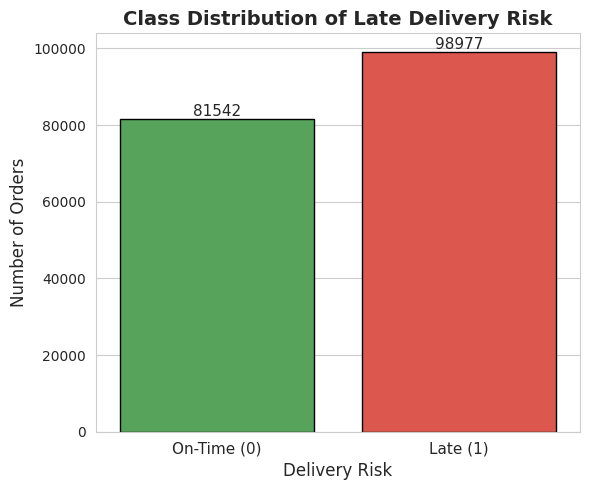

In [ ]:
plt.figure(figsize=(6, 5))

# Use hue for colors, and disable the legend since it's redundant
ax = sns.countplot(x='Late_delivery_risk', hue='Late_delivery_risk',
                   data=df, palette=['#4CAF50', '#F44336'], legend=False, edgecolor='black')

# Add count labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=11, label_type='edge')

# Customize axes and title
ax.set_xticklabels(['On-Time (0)', 'Late (1)'], fontsize=11)
plt.title('Class Distribution of Late Delivery Risk', fontsize=14, fontweight='bold')
plt.xlabel('Delivery Risk', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

plt.tight_layout()
plt.show()

**Late Delivery Risk Analysis:**

The plot compares the count of orders that were **On-Time** (labeled '0') versus those classified as **Late** (labeled '1'), indicating the delivery risk status for the dataset.

* **Late Orders Dominate:** The vast majority of orders fall into the **Late (1)** category, totaling **98,977** orders.
* **On-Time Orders:** The **On-Time (0)** category accounts for **81,542** orders.
* **Imbalanced Classes:** The classes are **imbalanced**, with significantly more late orders than on-time orders. The number of late orders is approximately **21.4% higher** than the number of on-time orders ($98,977 - 81,542 = 17,435$ more late orders).

This distribution is critical for any subsequent analysis or machine learning model, as it suggests that late delivery is the **more frequent outcome** in the supply chain data.

---

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Sales', bins=40, kde=True, color="skyblue", edgecolor="black")

# Format x-axis with commas
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title('Distribution of Sales', fontsize=16, fontweight='bold')
plt.xlabel('Sales (in USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

**Analysis of Sales Distribution**

The plot shows how often different sales amounts occur, focusing on the lower end of the sales spectrum.

* **High Frequency at Low Sales:** The distribution is heavily concentrated towards the lower sales values, indicating that the vast majority of transactions are for amounts **less than \$500**.
* **Multiple Modes (Peaks):** The data is **multimodal**, featuring several distinct peaks in frequency:
    * The largest peak is prominent around **\$100 to \$150**, with a frequency exceeding 50,000.
    * Other significant peaks occur near **\$200–\$250** and **\$350–\$450**.
* **Rapid Drop-off:** The frequency of transactions drops off dramatically after \$500. Sales amounts between **\$500 and \$1,500** are extremely rare, with the histogram bars near zero for this range.
* **Outlier/High-Value Transactions:** There is a tiny spike, indicating a very low frequency, of transactions occurring around **\$1,500**. This suggests that sales of this magnitude are rare, high-value outliers compared to the bulk of the transactions.
* **Overall Skewness:** The distribution is highly **right-skewed** (positively skewed), which is typical for sales data where many small transactions occur, and very few transactions occur at high dollar amounts.

---

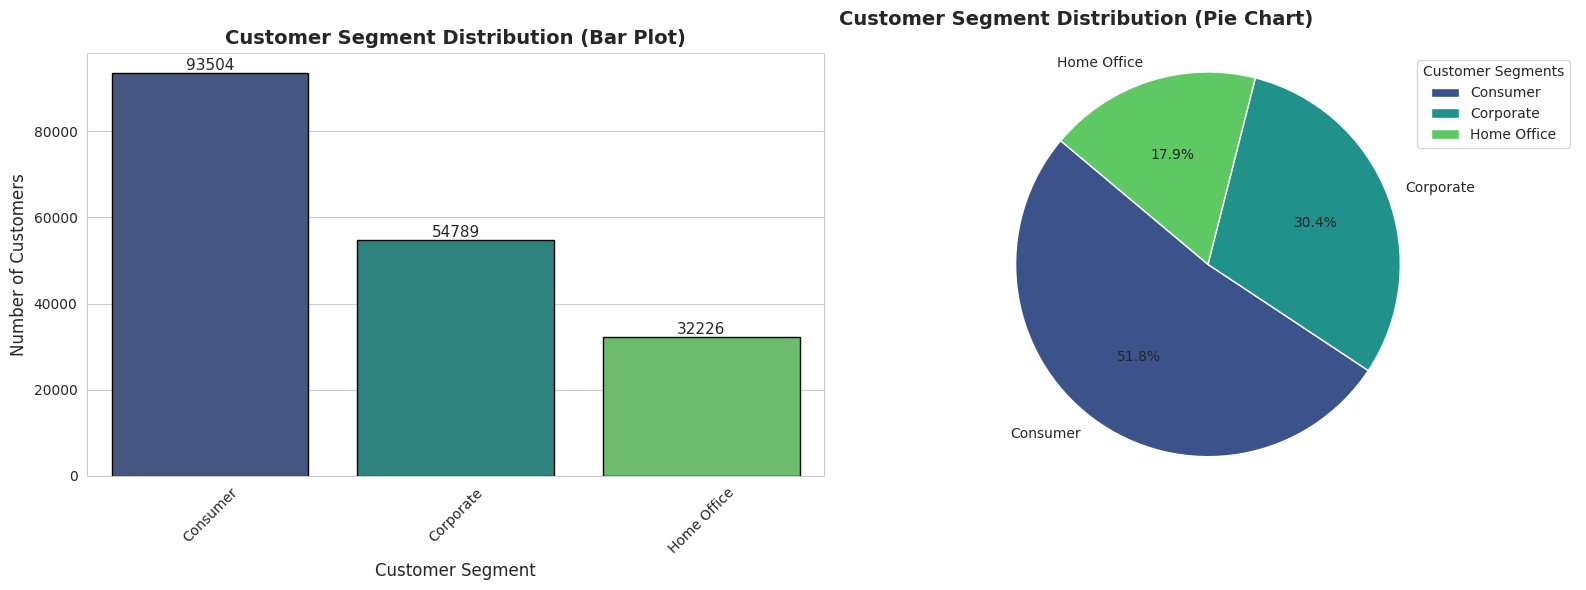

In [ ]:
# Count of customers in each segment
customer_segment_counts = df['Customer Segment'].value_counts()

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Bar Plot ---
ax1 = axes[0]
sns.barplot(x=customer_segment_counts.index, y=customer_segment_counts.values,
            palette="viridis", edgecolor='black', ax=ax1)

# Add counts on top of bars
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', fontsize=11, label_type='edge')

ax1.set_title('Customer Segment Distribution (Bar Plot)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Customer Segment', fontsize=12)
ax1.set_ylabel('Number of Customers', fontsize=12)
ax1.set_xticklabels(customer_segment_counts.index, rotation=45)

# --- Pie Chart ---
ax2 = axes[1]
ax2.pie(customer_segment_counts, labels=customer_segment_counts.index,
        autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(customer_segment_counts)))
ax2.set_title('Customer Segment Distribution (Pie Chart)', fontsize=14, fontweight='bold', loc='left', pad=20)
ax2.axis('equal')  # Equal aspect ratio ensures pie is circular
ax2.legend(customer_segment_counts.index, title='Customer Segments', loc='best')

plt.tight_layout()
plt.show()

**Customer Segment Analysis**

The visualization provides a comprehensive breakdown of the customer base across three distinct segments: **Consumer**, **Corporate**, and **Home Office**.

* The **Consumer** segment has the largest number of customers, totaling **93,504**, which accounts for over half of the entire customer base at **51.8%**.
* The **Corporate** segment is the second largest, with **54,789** customers, representing nearly one-third of the total customer count at **30.4%**.
* The **Home Office** segment is the smallest, accounting for **32,226** customers, which makes up the remaining **17.9%** of the customer base.

The **Consumer** segment represents over half of the entire customer base, making it the primary focus in terms of sheer numbers.This highlights the importance of focusing on accurate demand forecasting, inventory planning,   and on-time delivery for this segment, as it represents the majority of orders and significantly impacts overall supply chain performance.
The **Corporate** and **Home Office** segments together account for the remaining 48.3%.

---

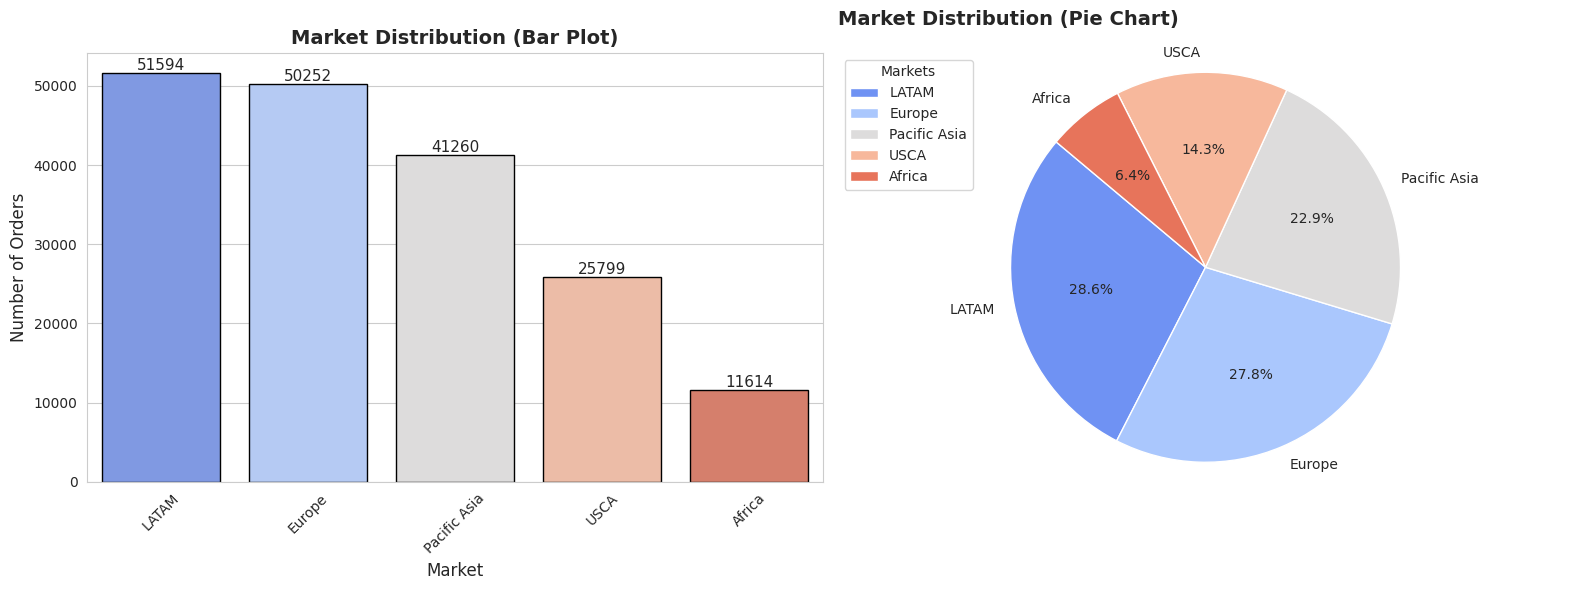

In [ ]:
# Count of orders in each market
market_counts = df['Market'].value_counts()

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Bar Plot ---
ax1 = axes[0]
sns.barplot(x=market_counts.index, y=market_counts.values,
            palette="coolwarm", edgecolor='black', ax=ax1)

# Add counts on top of bars
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', fontsize=11, label_type='edge')

ax1.set_title('Market Distribution (Bar Plot)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Market', fontsize=12)
ax1.set_ylabel('Number of Orders', fontsize=12)
ax1.set_xticklabels(market_counts.index, rotation=45)

# --- Pie Chart ---
ax2 = axes[1]
ax2.pie(market_counts, labels=market_counts.index,
        autopct='%1.1f%%', startangle=140, colors=sns.color_palette("coolwarm", len(market_counts)))
ax2.set_title('Market Distribution (Pie Chart)', fontsize=14, fontweight='bold', loc='left', pad=20)
ax2.axis('equal')  # Equal aspect ratio ensures pie is circular
ax2.legend(market_counts.index, title='Markets', loc='best')

plt.tight_layout()
plt.show()

**Market Distribution Analysis**

The data clearly identifies **LATAM** (Latin America) and **Europe** as the dominant markets, both in terms of absolute order volume and percentage share.

* The **LATAM** region has the highest number of orders at **51,594**, securing the largest percentage of the total market at **28.6%**.
* **Europe** follows very closely, with **50,252** orders, representing **27.8%** of the market share.

Together, these two regions account for **56.4%** of all orders, making them the primary drivers of total volume. This highlights the critical importance of ensuring robust logistics networks, efficient warehousing, and low lead times in these regions to maximize operational efficiency and maintain customer satisfaction.

The remaining three regions account for the other segment of the market:

* **Pacific Asia** is a significant third market, with **41,260** orders, contributing **22.9%** to the total volume.
* **USCA** (United States and Canada) holds **25,799** orders, or **14.3%** of the share.
* **Africa** is the smallest market shown, with **11,614** orders, accounting for **6.4%** of the total.

The distinct differences in order volume across these markets suggest that supply chain strategies, such as inventory stocking levels and fulfillment priorities, should be tiered to reflect this distribution.

---

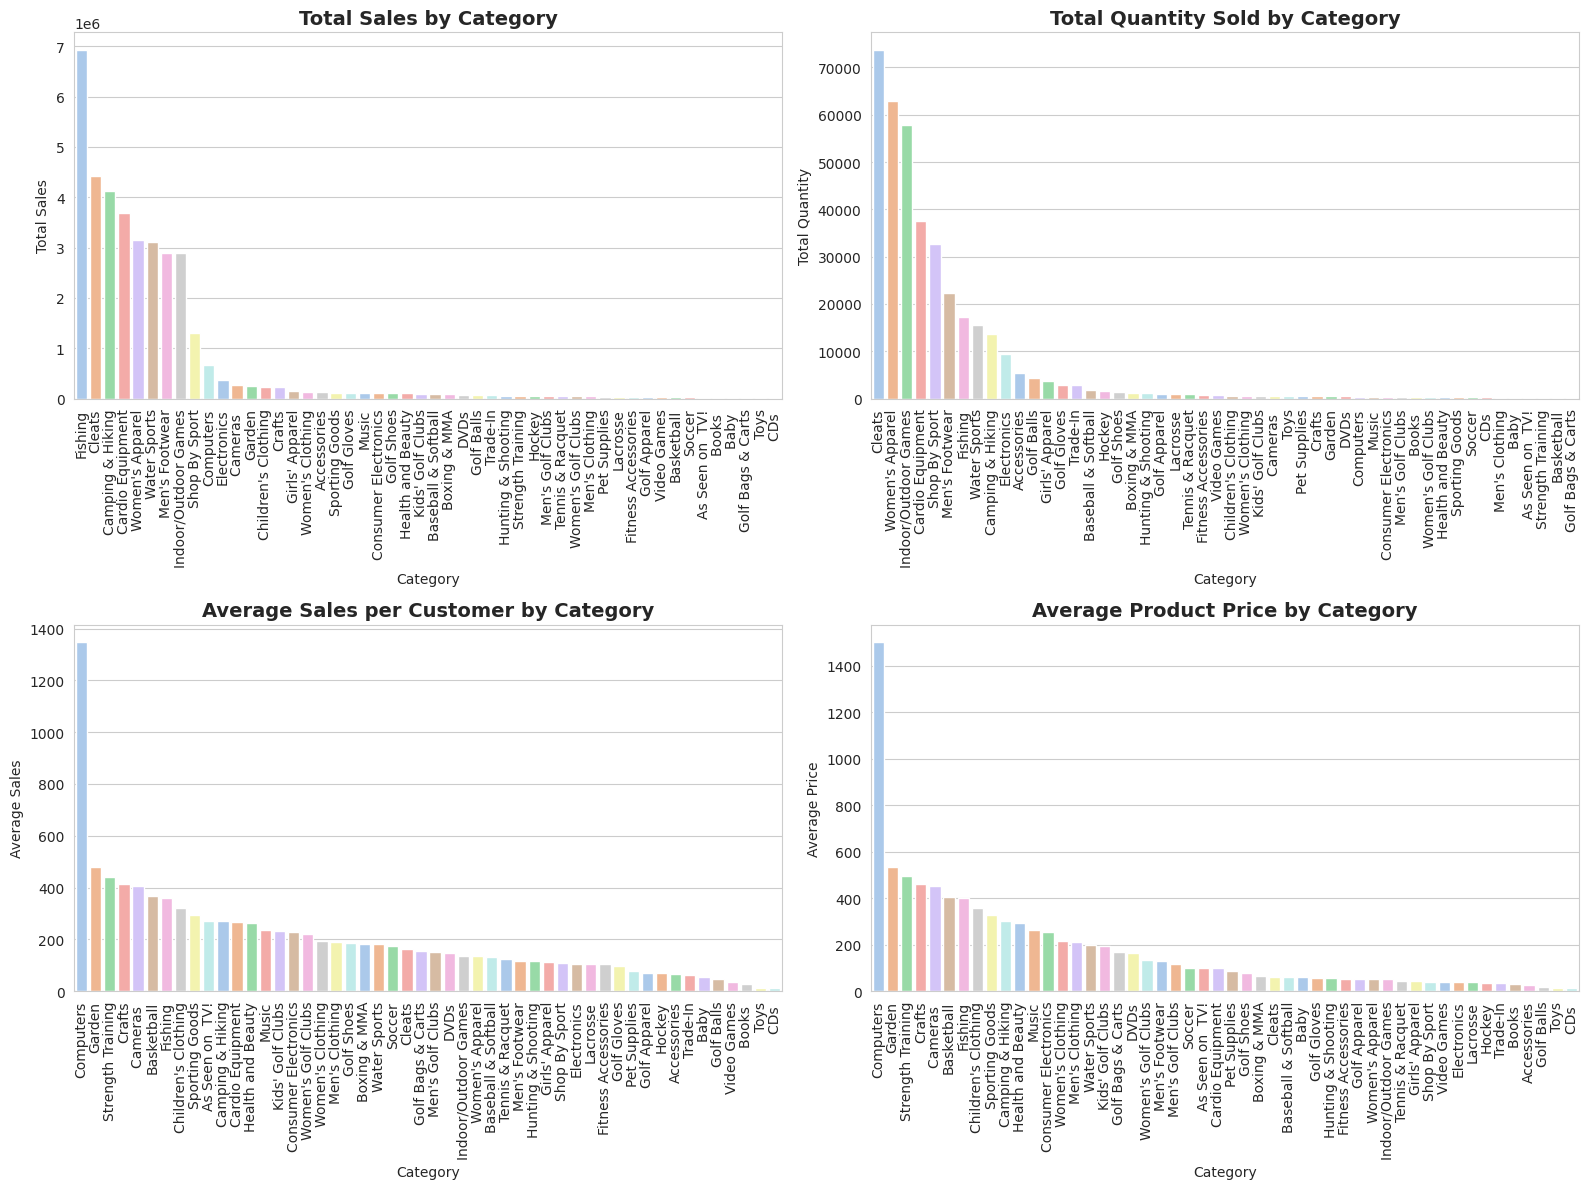

In [ ]:
palette = sns.color_palette("pastel")

# Group by Category Name
Category = df.groupby('Category Name')

# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# --- Total Sales ---
total_sales = Category['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=total_sales.index, y=total_sales.values, palette=palette, ax=axes[0, 0])
axes[0, 0].set_title("Total Sales by Category", fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel("Category")
axes[0, 0].set_ylabel("Total Sales")
axes[0, 0].tick_params(axis='x', rotation=90)

# --- Total Quantity ---
total_quantity = Category['Order Item Quantity'].sum().sort_values(ascending=False)
sns.barplot(x=total_quantity.index, y=total_quantity.values, palette=palette, ax=axes[0, 1])
axes[0, 1].set_title("Total Quantity Sold by Category", fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel("Category")
axes[0, 1].set_ylabel("Total Quantity")
axes[0, 1].tick_params(axis='x', rotation=90)

# --- Average Sales per Customer ---
avg_sales = Category['Sales per customer'].mean().sort_values(ascending=False)
sns.barplot(x=avg_sales.index, y=avg_sales.values, palette=palette, ax=axes[1, 0])
axes[1, 0].set_title("Average Sales per Customer by Category", fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel("Category")
axes[1, 0].set_ylabel("Average Sales")
axes[1, 0].tick_params(axis='x', rotation=90)

# --- Average Product Price ---
avg_price = Category['Product Price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price.index, y=avg_price.values, palette=palette, ax=axes[1, 1])
axes[1, 1].set_title("Average Product Price by Category", fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel("Category")
axes[1, 1].set_ylabel("Average Price")
axes[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

This set of four bar plots provides a comprehensive analysis of the **Category** performance.

1. Revenue and Volume Drivers (Total Sales and Quantity)

The top two charts, **Total Sales by Category** and **Total Quantity Sold by Category**, show a strong correlation, indicating that overall revenue is primarily driven by sales volume.

* **Dominance of Fishing:** The **Fishing** category is the clear leader in both metrics, recording the highest **Total Sales** and the highest **Total Quantity** sold. This signifies that Fishing products are the most frequently sold items by volume across the entire supply chain.
* **Next Tier Categories:** Following Fishing, categories like **Camping & Hiking**, **Water Sports**, and **Indoor/Outdoor Games** consistently form the next tier of high-volume and high-revenue generating products.
* **Low Performers:** Categories such as 'CDS', 'Videos', and 'Golf Bags & Carts' have the lowest contributions to both total sales and total quantity.

2. Value and Pricing Drivers (Average Sales and Price)

The bottom two charts, **Average Sales per Customer by Category** and **Average Product Price by Category**, highlight product categories that drive high value per transaction, independent of total volume. The rankings here are significantly different from the volume charts.

* **Highest Value Transactions:** The **Computers** category emerges as the leader in both **Average Sales per Customer** and **Average Product Price**. This indicates that while the total volume of Computers sold may be lower (as seen in the top charts), the high unit price of these items results in the highest average revenue generated per single customer transaction for that category.
* **Premium Categories:** Other categories with high average pricing and customer spend include **Strength Training**, **Basketball**, and **Children's Clothing**.
* **Volume vs. Value Discrepancy:** High-volume categories like **Fishing** and **Camping & Hiking** appear lower on these average value charts. This confirms a key insight: the success of the Fishing category is due to a **high number of transactions involving lower-priced items**, while the success of the Computers category is due to a **lower number of transactions involving very high-priced items**.

---

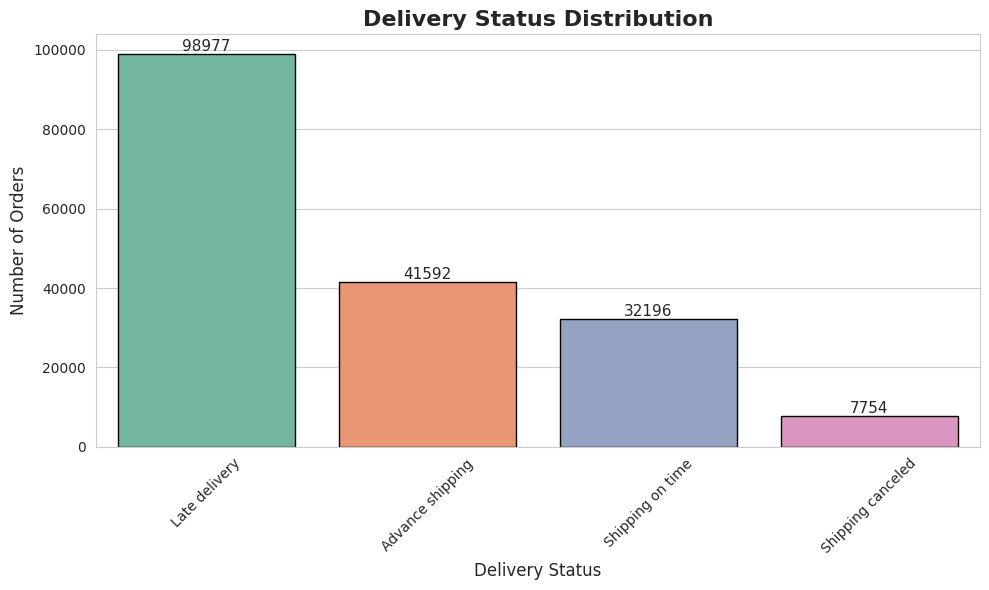

In [ ]:
# Select column
delivery_status_data = df['Delivery Status']

# Summary statistics
delivery_status_summary = delivery_status_data.value_counts()

# Set style
palette = sns.color_palette("Set2")

# Plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Delivery Status',
                   order=delivery_status_summary.index, palette=palette, edgecolor='black')

# Add counts on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=11, label_type='edge')

# Titles and labels
plt.title('Delivery Status Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Delivery Status', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

**Delivery Status Analysis**

The data separates orders into four distinct delivery categories, showing a clear imbalance in the frequency of each status.

* **Late Delivery Dominance:** The most frequent status is **Late delivery**, accounting for **98,977** orders. This is the single largest category by a significant margin, suggesting a major operational challenge in meeting delivery deadlines.
* **Advance Shipping:** The second most common status is **Advance shipping** (delivery ahead of schedule), with **41,592** orders.
* **Shipping On Time:** Orders that were **Shipping on time** (meeting the deadline exactly) total **32,196**.
* **Shipping Canceled:** The least frequent status is **Shipping canceled**, with only **7,754** orders.

---

<Figure size 1200x800 with 0 Axes>

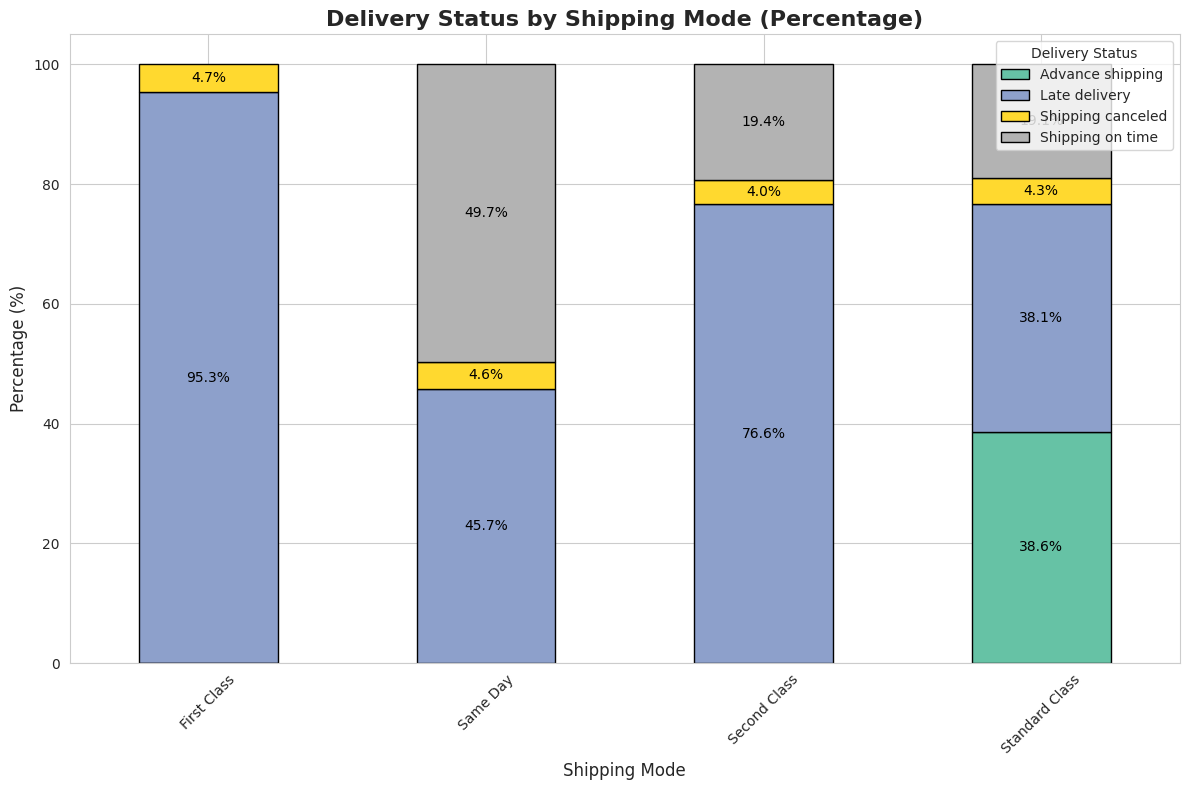

In [ ]:
# Filter late deliveries (optional)
late_deliveries = df[df['Delivery Status'] == 'Late delivery']

# Select data
delivery_status_data = df['Delivery Status']
shipping_mode_data = df['Shipping Mode']

# Create cross-tabulation
cross_tab = pd.crosstab(shipping_mode_data, delivery_status_data)

# Calculate row percentages
cross_tab_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
plt.figure(figsize=(12, 8))
ax = cross_tab_percent.plot(kind='bar', stacked=True, colormap='Set2', edgecolor='black', figsize=(12,8))

plt.title('Delivery Status by Shipping Mode (Percentage)', fontsize=16, fontweight='bold')
plt.xlabel('Shipping Mode', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45)

# Add percentage labels on top of each segment
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if height > 0:  # only label non-zero values
        ax.text(x + width/2, y + height/2, f'{height:.1f}%', ha='center', va='center', fontsize=10, color='black')

plt.legend(title='Delivery Status', loc='upper right')
plt.tight_layout()
plt.show()

**Delivery Status by Shipping Mode Analysis**

The analysis compares the proportion of four delivery outcomes (**Advance shipping**, **Late delivery**, **Shipping canceled**, and **Shipping on time**) across the four major shipping modes.

1. Delivery Status Dominance by Shipping Mode

The status that accounts for the largest percentage varies by shipping mode:

* **First Class:** Heavily dominated by **Late delivery** at **95.3%**.
* **Same Day:** The largest segment is **Shipping on time** at **49.7%**, meaning Late delivery (45.7%) is *not* the primary outcome.
* **Second Class:** Strongly dominated by **Late delivery** at **76.6%**.
* **Standard Class:** The largest segment is **Advance shipping** at **38.6%**, which is marginally higher than the Late delivery rate of **38.1%**.

2. Key Performance Insights

* **Highest Late Rate:** **First Class** is the least reliable, with over **95%** of orders resulting in late delivery.
* **Best Reliability:** The **Same Day** mode shows the best on-time performance, with its lowest **Late delivery** rate at **45.7%** and the highest **Shipping on time** rate at **49.7%**.
* **Most Orders Ahead of Schedule:** **Standard Class** has the highest percentage of **Advance shipping** at **38.6%**.
* **Highest Cancellation Rate:** **Same Day** shipping has the highest percentage of **Shipping canceled** orders at **4.6%**.

---

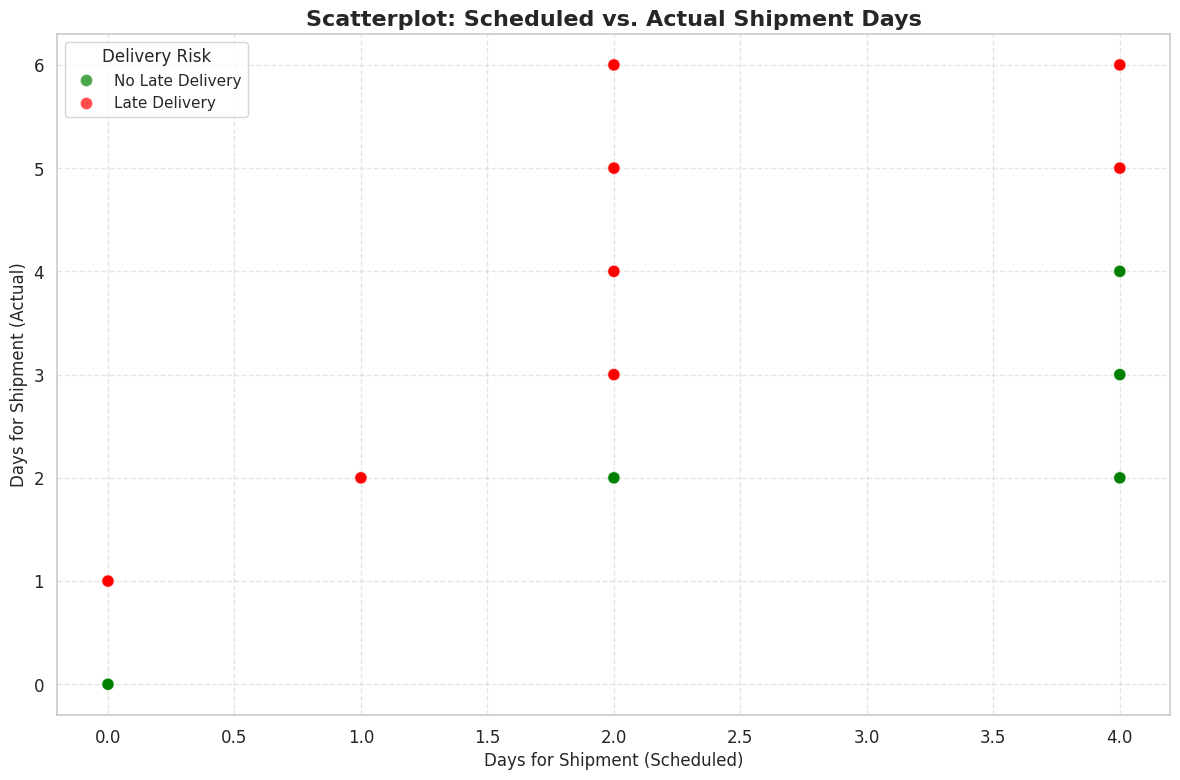

In [ ]:
# Map Late_delivery_risk to descriptive labels
df['Late_delivery_risk'] = df['Late_delivery_risk'].map({0: 'No Late Delivery', 1: 'Late Delivery'})

# Color palette
palette = {'No Late Delivery': 'green', 'Late Delivery': 'red'}

# Set Seaborn style
sns.set_context("notebook", font_scale=1.1)

# Create scatter plot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x="Days for shipment (scheduled)", y="Days for shipping (real)",
    hue="Late_delivery_risk", data=df, palette=palette, s=80, alpha=0.7)

# Titles and labels
plt.title('Scatterplot: Scheduled vs. Actual Shipment Days', fontsize=16, fontweight='bold')
plt.xlabel('Days for Shipment (Scheduled)', fontsize=12)
plt.ylabel('Days for Shipment (Actual)', fontsize=12)

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Delivery Risk', fontsize=11, title_fontsize=12)

plt.tight_layout()
plt.show()

**Analysis of Delivery Risk**

The key to interpreting this plot is the conceptual line $Y=X$ (where Actual Days equals Scheduled Days).

The plot shows a **perfect classification of late delivery**: an order is classified as a **Late Delivery** (red point) if and only if the **Actual Days for Shipment** is **greater than** the **Days for Shipment (Scheduled)**. Conversely, an order is classified as **No Late Delivery** (green point) if the Actual Days for Shipment is **less than or equal to** the Scheduled Days for Shipment.

1. No Late Delivery (Green Points)

The green points, labeled **'No Late Delivery'**, consistently fall at or below the scheduled shipment time:

* **Ahead of Schedule:** For all scheduled day values greater than zero (1, 2, 3, and 4 days), the actual shipment time is **less than** the scheduled time. For example, when **4 days** are scheduled, the orders are delivered in 2, 3, or 4 actual days.
* **On Time:** The green points appear to define the **maximum acceptable actual shipping time** for that scheduled duration. For instance, an order scheduled for 4 days that takes exactly 4 days is classified as 'No Late Delivery'.

2. Late Delivery (Red Points)

The red points, labeled **'Late Delivery'**, occur when the actual shipment time **exceeds** the scheduled time:

* **Actual Exceeds Scheduled:** For every scheduled day value (1, 2, 3, and 4 days), the 'Late Delivery' points always plot **above** the 'No Late Delivery' points and significantly above the scheduled time.
    * An order scheduled for **2 days** that takes 3, 4, 5, or 6 days is marked as late.
    * An order scheduled for **4 days** that takes 5 or 6 days is marked as late.

---    

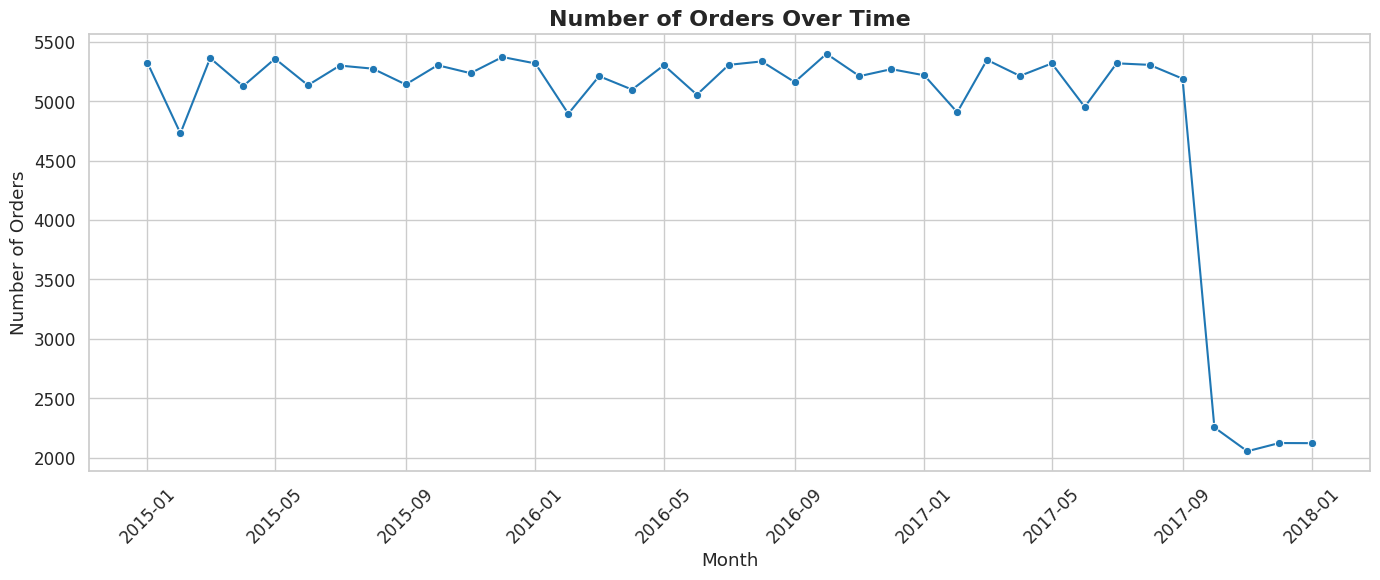

In [ ]:
# Ensure the order date is datetime
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])

# Aggregate orders per month
orders_over_time = df.groupby(df['order date (DateOrders)'].dt.to_period('M')).size()
orders_over_time.index = orders_over_time.index.to_timestamp()

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(x=orders_over_time.index, y=orders_over_time.values, marker='o')
plt.title('Number of Orders Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Analysis of Order Trends**

The plot reveals two distinct phases in the order volume: a period of stability followed by a sharp and significant decline.

1. Period of Stability (January 2015 - August 2017)

* **Consistent Volume:** For the majority of the period, the number of orders was remarkably stable, fluctuating narrowly between approximately **4,900 and 5,400 orders per month**.
* **Average Trend:** The overall volume remained high and consistent, showing a steady operational level with minor monthly variations but no clear upward or downward trend.
* **Peak Activity:** Peaks typically hovered around **5,400 orders**, such as in January 2015, September 2015, and October 2016.

2. Significant Decline (September 2017 Onwards)

* **Dramatic Drop:** A severe and sudden drop in order volume occurred around **September 2017**. The order count plummeted from around 5,200 orders in August 2017 to approximately **2,200 orders** in September 2017.
* **New Baseline:** After the drop, the order volume established a new, much lower baseline, fluctuating between roughly **2,000 and 2,200 orders** for the remainder of the dataset (through the end of 2017).

---

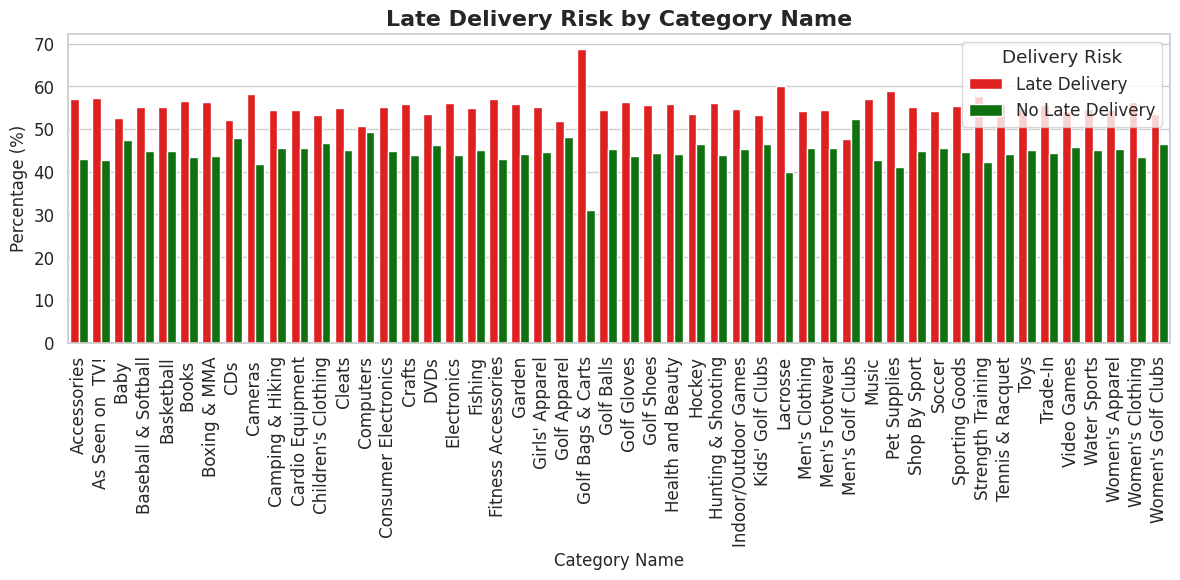

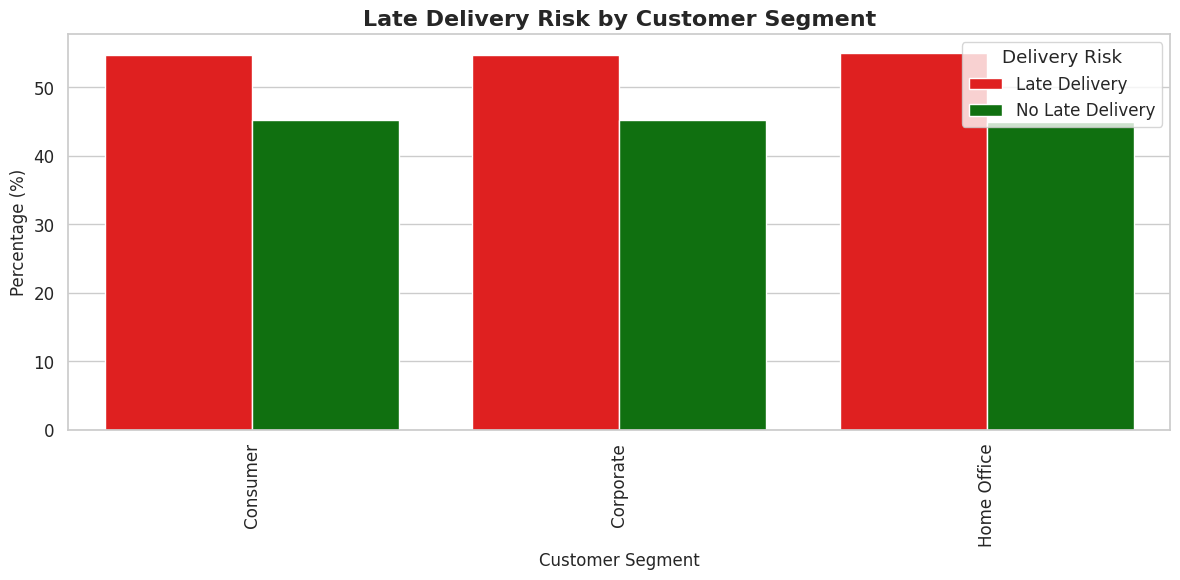

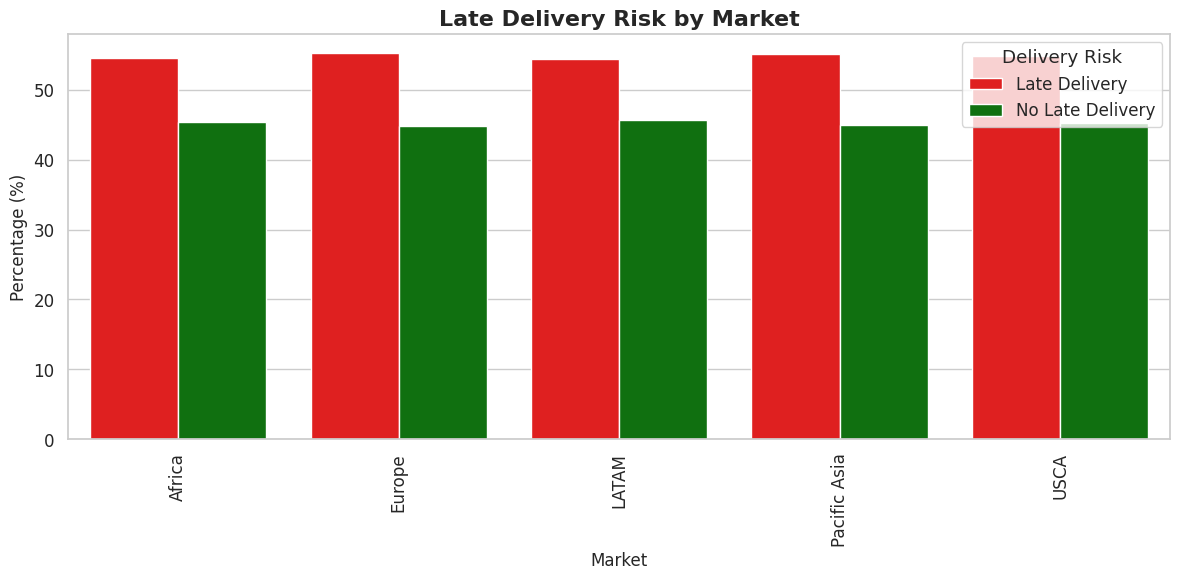

In [ ]:
def plot_late_delivery_by_feature_sns(feature_name):
    # Create cross-tab and calculate percentages
    cross_tab = pd.crosstab(df[feature_name], df['Late_delivery_risk'])
    cross_tab_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

    # Convert to long format for seaborn
    data_long = cross_tab_percent.reset_index().melt(
        id_vars=feature_name,
        var_name='Delivery Risk',
        value_name='Percentage'
    )

    # Plot
    plt.figure(figsize=(12,6))
    sns.barplot(
        x=feature_name,
        y='Percentage',
        hue='Delivery Risk',
        data=data_long,
        palette={'No Late Delivery': 'green', 'Late Delivery': 'red'}
    )

    plt.title(f'Late Delivery Risk by {feature_name}', fontsize=16, fontweight='bold')
    plt.xlabel(feature_name, fontsize=12)
    plt.ylabel('Percentage (%)', fontsize=12)
    plt.xticks(rotation=90)
    plt.legend(title='Delivery Risk', loc='upper right')
    plt.tight_layout()
    plt.show()

# Example usage
plot_late_delivery_by_feature_sns('Category Name')
plot_late_delivery_by_feature_sns('Customer Segment')
plot_late_delivery_by_feature_sns('Market')

This analysis, spanning **Customer Segment**, **Market**, and **Product Category**, reveals a pervasive issue: **Late Delivery is the dominant outcome across the entire operation.**

The defining characteristic across the Customer Segment and Market dimensions is the near-uniformity of the late delivery risk, suggesting the cause is **systemic and internal**, rather than customer or geography-specific.

Systemic Late Delivery (The Consistent Majority) 🔴

* **Customer Segments:** The Late Delivery risk is virtually identical—approximately **54%**—for the **Consumer**, **Corporate**, and **Home Office** segments. The customer type has no observable impact on delivery success.
* **Markets:** Similarly, the Late Delivery percentage falls consistently between **53% and 55%** for all five markets (**Europe**, **LATAM**, **Pacific Asia**, **USCA**, and **Africa**). This strong consistency indicates that the challenges are not rooted in external, market-specific logistics.

Exceptions to the Rule (The Drivers of Variation) ⛳

The only dimension showing significant variation is **Product Category**, which helps isolate areas for targeted improvement:

* **Highest Risk Categories:** The primary risk clusters around **Golf-related products**, where late delivery risk spikes dramatically. **Golf Bags & Carts** are the clear outlier, with a late delivery rate approaching **70%**. Other Golf clubs (Men's, Women's, and Kids') also show risk rates well over 60%.
* **Lowest Risk Categories:** Categories with relatively lower risk (closest to a 50/50 split) include smaller, non-physical, or easily managed items like **CDs**, **DVDs**, and **Music**.

---

In [ ]:
# Aggregate orders by city (latitude & longitude)
orders_geo = df.groupby(['Customer City', 'Latitude', 'Longitude']).size().reset_index(name='num_orders')

# Create an interactive world map
fig = px.scatter_geo(orders_geo, lat='Latitude',
    lon='Longitude', hover_name='Customer City',
    size='num_orders',          # bubble size proportional to number of orders
    color='num_orders',         # color scale for number of orders
    color_continuous_scale='Viridis', projection='natural earth', title='Worldwide Orders by City')

fig.update_layout(geo=dict(showland=True, landcolor="lightgray"), title_x=0.5)

fig.show()

## **Preprocessing**

### **Handling Missing Values**

In [ ]:
num_cols = df.select_dtypes(include=['number']).shape[1] # Count numerical columns (int, float types)
cat_cols = df.select_dtypes(include=['object', 'category']).shape[1] # Count categorical columns (object, category types)

print(f"Numerical columns: {num_cols}")
print(f"Categorical columns: {cat_cols}")

Numerical columns: 28
Categorical columns: 24


In [ ]:
df.isna().sum()  # Count the number of missing (NaN) values in each column

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0
Order City                            0
Order Country                         0
Order Customer Id                     0
order date (DateOrders)               0
Order Id                              0
Order Item Cardprod Id                0
Order Item Discount                   0
Order Item Discount Rate              0
Order Item Id                         0
Order Item Product Price              0
Order Item Profit Ratio               0
Order Item Quantity                   0
Sales                                 0
Order Item Total                      0
Order Profit Per Order                0
Order Region                          0
Order State                           0
Order Status                          0
Order Zipcode                    155679
Product Card Id                       0
Product Category Id                   0
Product Description              180519
Product Image                         0
Product Name                          0
Product Price                         0
Product Status                        0
shipping date (DateOrders)            0
Shipping Mode                         0
dtype: int64

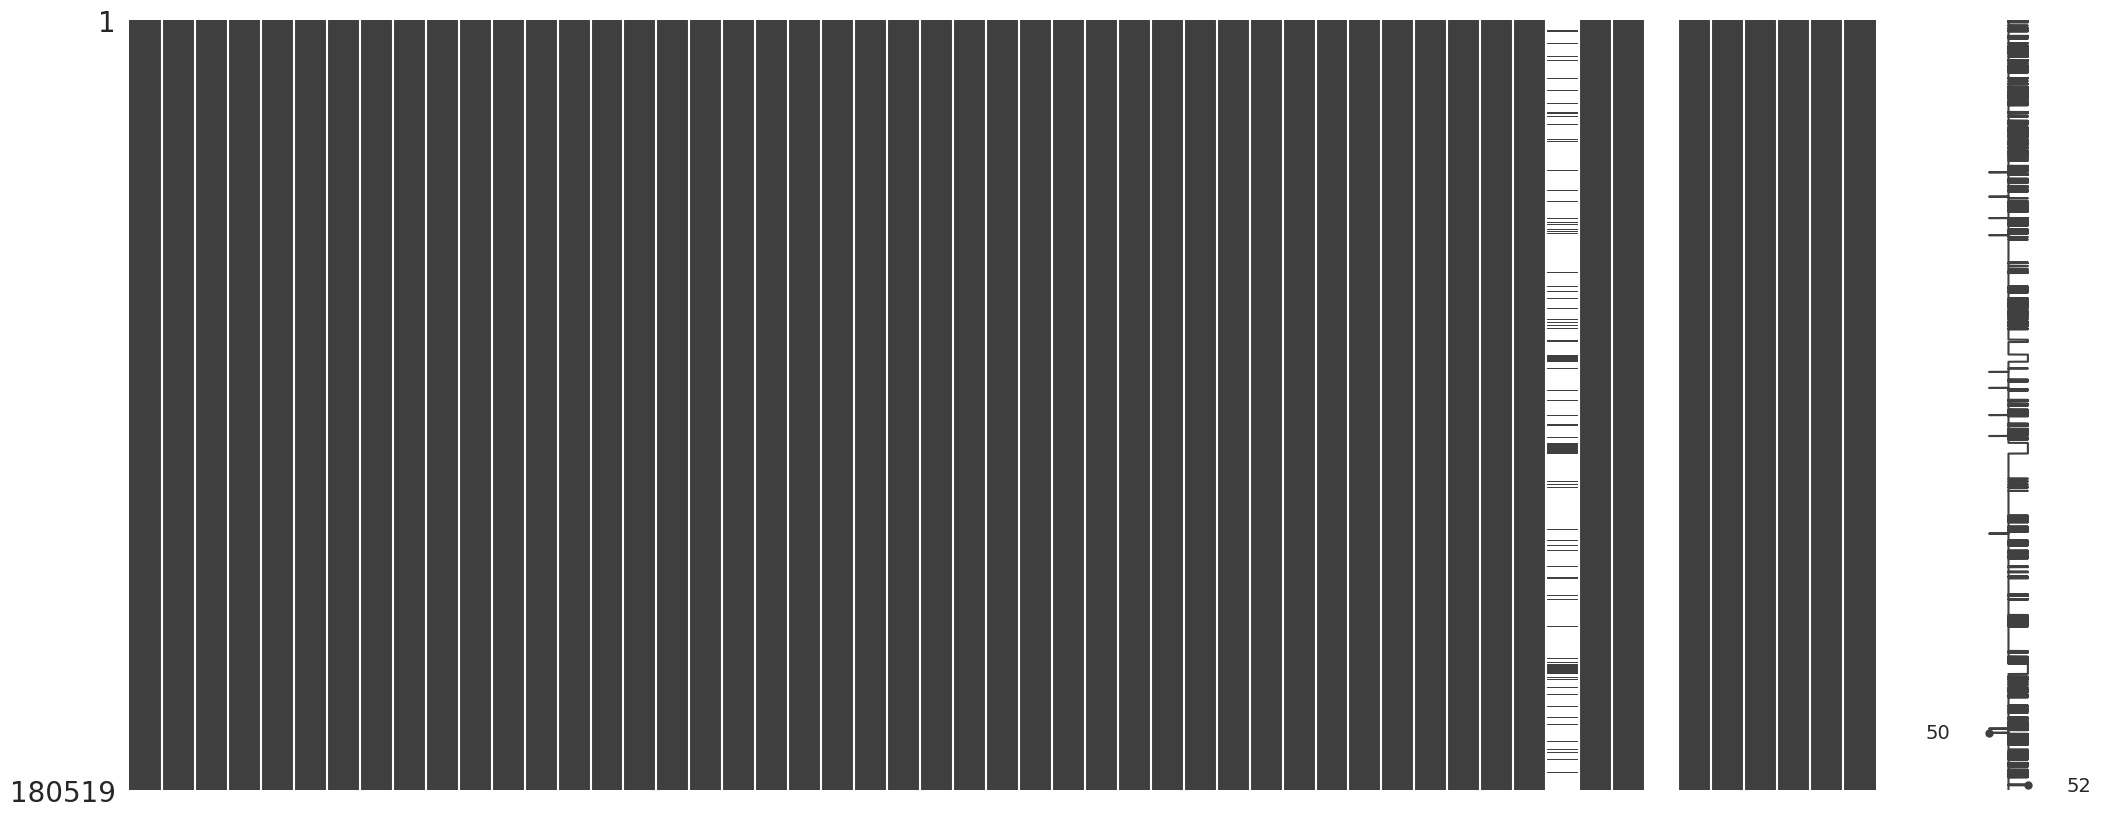

In [ ]:
msno.matrix(df);

- Almost all columns have no missing values, which shows the dataset is clean.
- The columns with missing values are:
  * Customer Lname (8 missing)
  * Customer Zipcode (3 missing)
  * Order Zipcode (155,679 missing)
  * Product Description (180,519 missing)

These columns are either not relevant for predicting Late Delivery Risk (e.g., names, zip codes, product descriptions) or contain too many missing values.
Therefore, we will drop them from the dataset to simplify analysis and modeling.

### **Dropping Unnecessary Columns**

In [ ]:
df = df.drop([
    'Customer Email',
    'Customer Password',
    'Customer Fname',
    'Customer Lname',
    'Customer Street',
    'Customer Zipcode',
    'Product Description',
    'Product Image',
    'Product Status',
    'Order Zipcode'
], axis=1)

In [ ]:
id_cols = [
    'Order Id', 'Customer Id', 'Order Item Id', 'Order Item Cardprod Id',
    'Product Card Id'
]
df = df.drop(columns=id_cols, errors='ignore')

In [ ]:
# Drop leakage columns
leakage_cols = [
    'Days for shipping (real)',   # post-delivery info
    'shipping date (DateOrders)'
]

df = df.drop(columns=leakage_cols, errors='ignore')

print("Remaining columns after leakage removal:", df.columns)

Remaining columns after leakage removal: Index(['Type', 'Days for shipment (scheduled)', 'Benefit per order',
       'Sales per customer', 'Delivery Status', 'Late_delivery_risk',
       'Category Id', 'Category Name', 'Customer City', 'Customer Country',
       'Customer Segment', 'Customer State', 'Department Id',
       'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City',
       'Order Country', 'Order Customer Id', 'order date (DateOrders)',
       'Order Item Discount', 'Order Item Discount Rate',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Product Category Id', 'Product Name', 'Product Price',
       'Shipping Mode'],
      dtype='object')


### **Feature Engineering**

In [ ]:
# Convert datetime columns to datetime type (if not already)
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])

# Extract useful time features
for col in ['order date (DateOrders)']:
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day
    df[col + '_weekday'] = df[col].dt.weekday
    df[col + '_hour'] = df[col].dt.hour

# Drop original datetime columns
df.drop(['order date (DateOrders)'], axis=1, inplace=True)

In [ ]:
df.head()

Type  Days for shipment (scheduled)  Benefit per order  \
0     DEBIT                              4          91.250000   
1  TRANSFER                              4        -249.089996   
2      CASH                              4        -247.779999   
3     DEBIT                              4          22.860001   
4   PAYMENT                              4         134.210007   

   Sales per customer   Delivery Status Late_delivery_risk  Category Id  \
0          314.640015  Advance shipping   No Late Delivery           73   
1          311.359985     Late delivery      Late Delivery           73   
2          309.720001  Shipping on time   No Late Delivery           73   
3          304.809998  Advance shipping   No Late Delivery           73   
4          298.250000  Advance shipping   No Late Delivery           73   

    Category Name Customer City Customer Country Customer Segment  \
0  Sporting Goods        Caguas      Puerto Rico         Consumer   
1  Sporting Goods        Caguas      Puerto Rico         Consumer   
2  Sporting Goods      San Jose          EE. UU.         Consumer   
3  Sporting Goods   Los Angeles          EE. UU.      Home Office   
4  Sporting Goods        Caguas      Puerto Rico        Corporate   

  Customer State  Department Id Department Name   Latitude   Longitude  \
0             PR              2         Fitness  18.251453  -66.037056   
1             PR              2         Fitness  18.279451  -66.037064   
2             CA              2         Fitness  37.292233 -121.881279   
3             CA              2         Fitness  34.125946 -118.291016   
4             PR              2         Fitness  18.253769  -66.037048   

         Market  Order City Order Country  Order Customer Id  \
0  Pacific Asia      Bekasi     Indonesia              20755   
1  Pacific Asia     Bikaner         India              19492   
2  Pacific Asia     Bikaner         India              19491   
3  Pacific Asia  Townsville     Australia              19490   
4  Pacific Asia  Townsville     Australia              19489   

   Order Item Discount  Order Item Discount Rate  Order Item Product Price  \
0            13.110000                      0.04                    327.75   
1            16.389999                      0.05                    327.75   
2            18.030001                      0.06                    327.75   
3            22.940001                      0.07                    327.75   
4            29.500000                      0.09                    327.75   

   Order Item Profit Ratio  Order Item Quantity   Sales  Order Item Total  \
0                     0.29                    1  327.75        314.640015   
1                    -0.80                    1  327.75        311.359985   
2                    -0.80                    1  327.75        309.720001   
3                     0.08                    1  327.75        304.809998   
4                     0.45                    1  327.75        298.250000   

   Order Profit Per Order    Order Region      Order State     Order Status  \
0               91.250000  Southeast Asia  Java Occidental         COMPLETE   
1             -249.089996      South Asia         Rajastán          PENDING   
2             -247.779999      South Asia         Rajastán           CLOSED   
3               22.860001         Oceania       Queensland         COMPLETE   
4              134.210007         Oceania       Queensland  PENDING_PAYMENT   

   Product Category Id  Product Name  Product Price   Shipping Mode  \
0                   73  Smart watch          327.75  Standard Class   
1                   73  Smart watch          327.75  Standard Class   
2                   73  Smart watch          327.75  Standard Class   
3                   73  Smart watch          327.75  Standard Class   
4                   73  Smart watch          327.75  Standard Class   

   order date (DateOrders)_year  order date (DateOrders)_month  \
0                   

This step processes the **date columns** to make them usable for machine learning models.

* First, both `order date (DateOrders)` and `shipping date (DateOrders)` are converted into proper `datetime` objects.
* From each timestamp, several informative **time-based features** are extracted:

  * `year`, `month`, `day`, `weekday`, and `hour`.
    These features capture seasonal trends, weekly patterns, and time-of-day effects that may influence delivery risk.
* Finally, the original datetime columns are dropped, since scikit-learn models cannot handle raw `Timestamp` objects.

As a result, we retain all useful temporal information in a numeric form that is model-friendly.

### **Encoding**

In [ ]:
df['Delivery Status'].unique()

array(['Advance shipping', 'Late delivery', 'Shipping on time',
       'Shipping canceled'], dtype=object)

In [ ]:
df['Late_delivery_risk'].unique()

array(['No Late Delivery', 'Late Delivery'], dtype=object)

In [ ]:
# Map 'Late_delivery_risk' to numbers (binary)
df['Late_delivery_risk'] = df['Late_delivery_risk'].map({
    'No Late Delivery': 0,
    'Late Delivery': 1})

# Map 'Delivery Status' to numbers (multi-class)
df['Delivery Status'] = df['Delivery Status'].map({
    'Shipping on time': 0,
    'Advance shipping': 1,
    'Late delivery': 2,
    'Shipping canceled': 3})

# Verify mapping
df[['Late_delivery_risk', 'Delivery Status']].head()

Late_delivery_risk  Delivery Status
0                   0                1
1                   1                2
2                   0                0
3                   0                1
4                   0                1

In [ ]:
# Column names
columns_to_encode = [
    'Customer Country', 'Market', 'Type', 'Product Name', 'Customer Segment',
    'Customer State', 'Order Region', 'Order City', 'Category Name',
    'Customer City', 'Department Name', 'Order State', 'Order Status',
    'Shipping Mode', 'Order Country']

# Initialize LabelEncoder
le = LabelEncoder()

# Encode the columns
for col in columns_to_encode:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])
    else:
        print(f"Column '{col}' not found in DataFrame and was skipped.")

# Verify encoding
df[columns_to_encode].head()

Customer Country  Market  Type  Product Name  Customer Segment  \
0                 1       3     1            78                 0   
1                 1       3     3            78                 0   
2                 0       3     0            78                 0   
3                 0       3     1            78                 2   
4                 1       3     2            78                 1   

   Customer State  Order Region  Order City  Category Name  Customer City  \
0              36            15         331             40             66   
1              36            13         391             40             66   
2               5            13         391             40            452   
3               5            11        3226             40            285   
4              36            11        3226             40             66   

   Department Name  Order State  Order Status  Shipping Mode  Order Country  
0                4          475             2              3             70  
1                4          841             5              3             69  
2                4          841             1              3             69  
3                4          835             2              3              8  
4                4          835             6              3              8

### **Feature-Target Separation**

In [ ]:
# Define target columns
target_cols = ['Late_delivery_risk', 'Delivery Status']

# Define features
feature_cols = [col for col in df.columns if col not in target_cols]

X = df[feature_cols]                        # Features
y_late_risk = df['Late_delivery_risk']      # Binary target
y_delivery_status = df['Delivery Status']   # Multi-class target

print("Features shape:", X.shape)
print("Late_delivery_risk shape:", y_late_risk.shape)
print("Delivery Status shape:", y_delivery_status.shape)

Features shape: (180519, 38)
Late_delivery_risk shape: (180519,)
Delivery Status shape: (180519,)


### **Train-Test Split**

In [ ]:
# --- Train-test split for Late_delivery_risk ---
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(
    X, y_late_risk, test_size=0.2, random_state=42, stratify=y_late_risk)

# --- Train-test split for Delivery Status ---
X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split(
    X, y_delivery_status, test_size=0.2, random_state=42, stratify=y_delivery_status)

# Print shapes
print("Late_delivery_risk -> X_train:", X_train_lr.shape, "X_test:", X_test_lr.shape)
print("Delivery Status -> X_train:", X_train_ds.shape, "X_test:", X_test_ds.shape)


Late_delivery_risk -> X_train: (144415, 38) X_test: (36104, 38)
Delivery Status -> X_train: (144415, 38) X_test: (36104, 38)


### **Scaling**

In [ ]:
# Initialize scaler
scaler_lr = StandardScaler()
scaler_ds = StandardScaler()

# --- Scale features for Late_delivery_risk ---
X_train_lr_scaled = scaler_lr.fit_transform(X_train_lr)  # fit on train only
X_test_lr_scaled = scaler_lr.transform(X_test_lr)        # transform test using same scaler

# --- Scale features for Delivery Status ---
X_train_ds_scaled = scaler_ds.fit_transform(X_train_ds)
X_test_ds_scaled = scaler_ds.transform(X_test_ds)

# Check shapes
print("Late_delivery_risk -> X_train_scaled:", X_train_lr_scaled.shape, "X_test_scaled:", X_test_lr_scaled.shape)
print("Delivery Status -> X_train_scaled:", X_train_ds_scaled.shape, "X_test_scaled:", X_test_ds_scaled.shape)

Late_delivery_risk -> X_train_scaled: (144415, 38) X_test_scaled: (36104, 38)
Delivery Status -> X_train_scaled: (144415, 38) X_test_scaled: (36104, 38)


## **Prediction Model**

In [ ]:
def evaluate_classifier(model, X_train, X_test, y_train, y_test, model_name="Model"):
    """
    Fits the given classifier, makes predictions, prints evaluation metrics,
    plots confusion matrix and ROC curve (if binary), and returns metrics & predictions.

    Returns a dictionary with all relevant metrics and y_pred.
    """

    # Fit the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='binary' if len(np.unique(y_test))==2 else 'macro')
    f1 = f1_score(y_test, y_pred, average='binary' if len(np.unique(y_test))==2 else 'macro')
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)

    # Print metrics
    print(f"=== {model_name} Evaluation ===")
    print(f"Accuracy: {accuracy*100:.2f}%")
    print(f"Recall: {recall*100:.2f}%")
    print(f"F1 Score: {f1*100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Plot Confusion Matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC-AUC curve (only for binary classification)
    auc_score = None
    if len(np.unique(y_test)) == 2:
        y_prob = model.predict_proba(X_test)[:,1]
        auc_score = roc_auc_score(y_test, y_prob)
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        plt.figure(figsize=(6,4))
        plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}', color='darkorange', linewidth=2)
        plt.plot([0,1], [0,1], 'k--', linewidth=1)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} - ROC Curve')
        plt.legend(loc='lower right')
        plt.show()
        print(f"ROC-AUC Score: {auc_score:.2f}")

    # Save metrics in a dictionary
    metrics_dict = {
        'model_name': model_name,
        'accuracy': accuracy,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': conf_matrix,
        'classification_report': class_report,
        'roc_auc': auc_score,
        'y_pred': y_pred,
        'y_pred_proba': y_prob if len(np.unique(y_test))==2 else None,  # store probabilities
        'model': model
    }

    return metrics_dict

### **Random Forest**

=== Random Forest - Late Delivery Risk Evaluation ===
Accuracy: 84.59%
Recall: 78.49%
F1 Score: 84.81%

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.92      0.84     16308
           1       0.92      0.78      0.85     19796

    accuracy                           0.85     36104
   macro avg       0.85      0.85      0.85     36104
weighted avg       0.86      0.85      0.85     36104



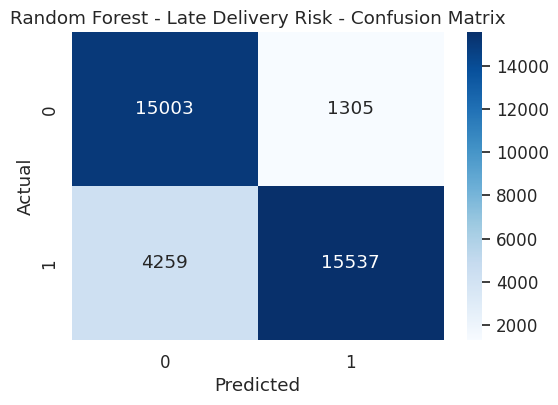

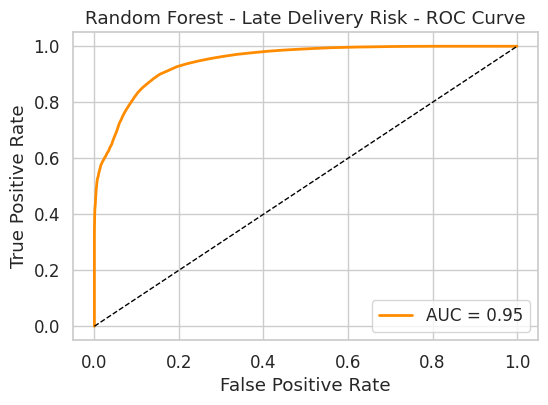

ROC-AUC Score: 0.95


In [ ]:
# Initialize the model
rf_model = RandomForestClassifier(
    n_estimators=100,        # Number of trees
    max_depth=None,          # No maximum depth
    random_state=42,
    n_jobs=-1                # Use all cores
)

# Evaluate the model using the comprehensive function
rf_metrics = evaluate_classifier(
    model=rf_model,
    X_train=X_train_lr,
    X_test=X_test_lr,
    y_train=y_train_lr,
    y_test=y_test_lr,
    model_name="Random Forest - Late Delivery Risk"
)

=== Random Forest - Delivery Status Evaluation ===
Accuracy: 85.46%
Recall: 83.49%
F1 Score: 85.01%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.52      0.68      6439
           1       0.77      0.88      0.82      8318
           2       0.86      0.94      0.90     19796
           3       1.00      1.00      1.00      1551

    accuracy                           0.85     36104
   macro avg       0.91      0.83      0.85     36104
weighted avg       0.87      0.85      0.85     36104



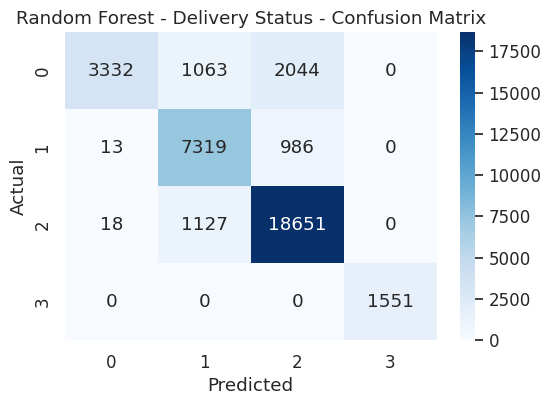

In [ ]:
# Initialize Random Forest for Delivery Status
rf_model_ds = RandomForestClassifier(
    n_estimators=100,   # Number of trees
    max_depth=None,     # No maximum depth
    random_state=42,
    n_jobs=-1           # Use all CPU cores
)

# Evaluate the model on Delivery Status
rf_metrics_ds = evaluate_classifier(
    model=rf_model_ds,
    X_train=X_train_ds,
    X_test=X_test_ds,
    y_train=y_train_ds,
    y_test=y_test_ds,
    model_name="Random Forest - Delivery Status"
)

### **Logistic Regression**

=== Logistic Regression - Late Delivery Risk Evaluation ===
Accuracy: 68.57%
Recall: 58.54%
F1 Score: 67.13%

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.81      0.70     16308
           1       0.79      0.59      0.67     19796

    accuracy                           0.69     36104
   macro avg       0.70      0.70      0.69     36104
weighted avg       0.71      0.69      0.68     36104



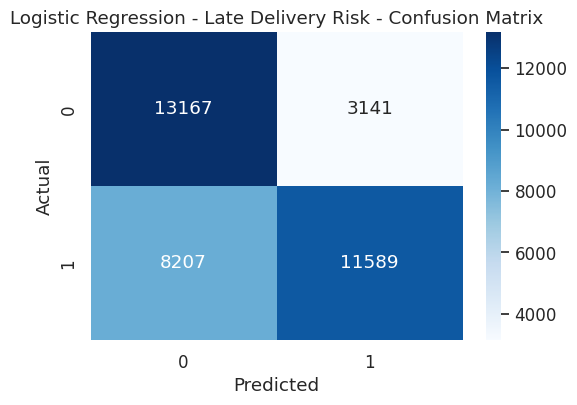

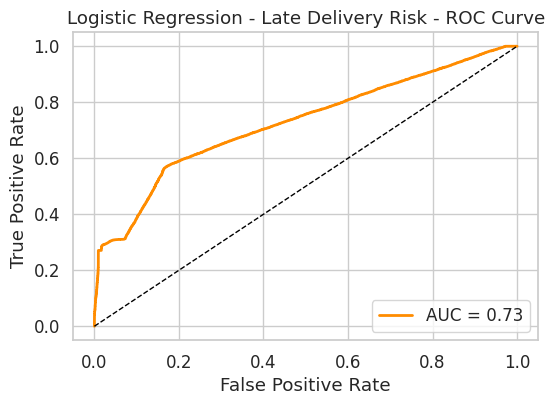

ROC-AUC Score: 0.73


In [ ]:
# Initialize Logistic Regression
log_reg = LogisticRegression(
    max_iter=1000,        # allow more iterations for convergence
    solver='liblinear',   # stable for binary/multi-class
    random_state=42
)

# Evaluate the model on Late Delivery Risk
log_metrics = evaluate_classifier(
    model=log_reg,
    X_train=X_train_lr,
    X_test=X_test_lr,
    y_train=y_train_lr,
    y_test=y_test_lr,
    model_name="Logistic Regression - Late Delivery Risk"
)

=== Logistic Regression - Delivery Status Evaluation ===
Accuracy: 56.57%
Recall: 38.60%
F1 Score: 39.57%

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6439
           1       0.40      0.23      0.29      8318
           2       0.58      0.90      0.71     19796
           3       1.00      0.41      0.58      1551

    accuracy                           0.57     36104
   macro avg       0.50      0.39      0.40     36104
weighted avg       0.45      0.57      0.48     36104



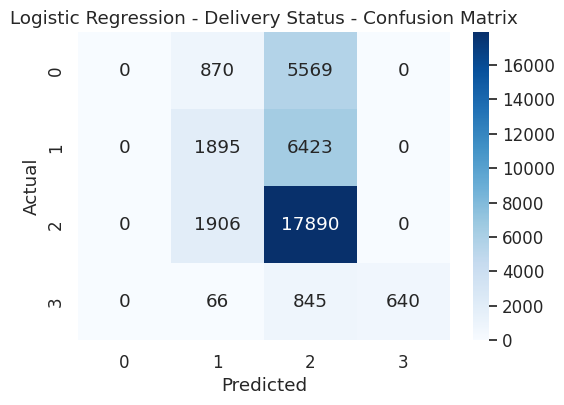

In [ ]:
# Initialize Logistic Regression for Delivery Status
log_reg_ds = LogisticRegression(
    max_iter=1000,        # allow more iterations for convergence
    solver='liblinear',   # works for small datasets / multi-class
    multi_class='ovr',    # one-vs-rest for multi-class classification
    random_state=42
)

# Evaluate the model on Delivery Status
log_metrics_ds = evaluate_classifier(
    model=log_reg_ds,
    X_train=X_train_ds,
    X_test=X_test_ds,
    y_train=y_train_ds,
    y_test=y_test_ds,
    model_name="Logistic Regression - Delivery Status"
)

### **XGBoost**

=== XGBoost - Late Delivery Risk Evaluation ===
Accuracy: 75.47%
Recall: 63.49%
F1 Score: 73.95%

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.90      0.77     16308
           1       0.89      0.63      0.74     19796

    accuracy                           0.75     36104
   macro avg       0.78      0.77      0.75     36104
weighted avg       0.79      0.75      0.75     36104



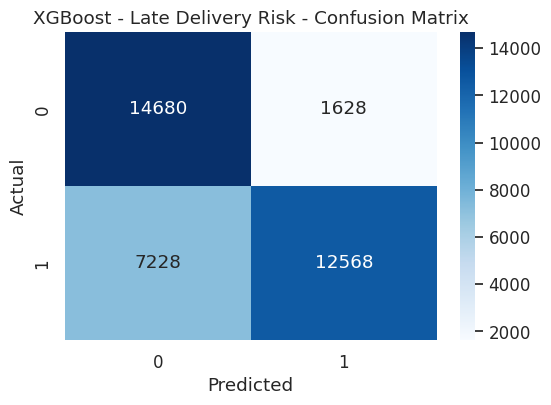

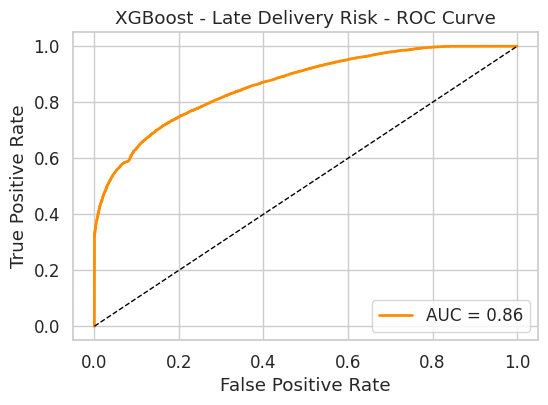

ROC-AUC Score: 0.86


In [ ]:
# Initialize XGBoost classifier
xgb_model = XGBClassifier(
    n_estimators=200,        # number of trees
    max_depth=6,             # maximum tree depth
    learning_rate=0.1,       # step size shrinkage
    subsample=0.8,           # row subsample
    colsample_bytree=0.8,    # column subsample
    random_state=42,
    use_label_encoder=False,  # avoids warnings
    eval_metric='logloss'     # required for binary classification
)

# Evaluate the model on Late Delivery Risk
xgb_metrics = evaluate_classifier(
    model=xgb_model,
    X_train=X_train_lr,
    X_test=X_test_lr,
    y_train=y_train_lr,
    y_test=y_test_lr,
    model_name="XGBoost - Late Delivery Risk"
)

=== XGBoost - Delivery Status Evaluation ===
Accuracy: 69.40%
Recall: 67.08%
F1 Score: 66.41%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.16      0.27      6439
           1       0.53      0.67      0.59      8318
           2       0.74      0.85      0.79     19796
           3       1.00      1.00      1.00      1551

    accuracy                           0.69     36104
   macro avg       0.81      0.67      0.66     36104
weighted avg       0.74      0.69      0.66     36104



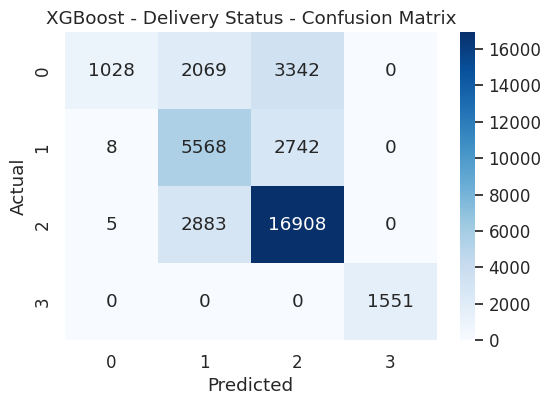

In [ ]:
# Initialize XGBoost for Delivery Status
xgb_model_ds = XGBClassifier(
    n_estimators=200,        # number of trees
    max_depth=6,             # maximum tree depth
    learning_rate=0.1,       # step size shrinkage
    subsample=0.8,           # row subsample
    colsample_bytree=0.8,    # column subsample
    random_state=42,
    use_label_encoder=False,  # avoids warnings
    eval_metric='mlogloss',   # multi-class logloss
    objective='multi:softprob',  # multi-class classification
    num_class=len(y_train_ds.unique())  # number of classes
)

# Evaluate the model on Delivery Status
xgb_metrics_ds = evaluate_classifier(
    model=xgb_model_ds,
    X_train=X_train_ds,
    X_test=X_test_ds,
    y_train=y_train_ds,
    y_test=y_test_ds,
    model_name="XGBoost - Delivery Status"
)

### **Decision Tree**

=== Decision Tree - Late Delivery Risk Evaluation ===
Accuracy: 73.68%
Recall: 59.07%
F1 Score: 71.11%

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.91      0.76     16308
           1       0.89      0.59      0.71     19796

    accuracy                           0.74     36104
   macro avg       0.77      0.75      0.73     36104
weighted avg       0.78      0.74      0.73     36104



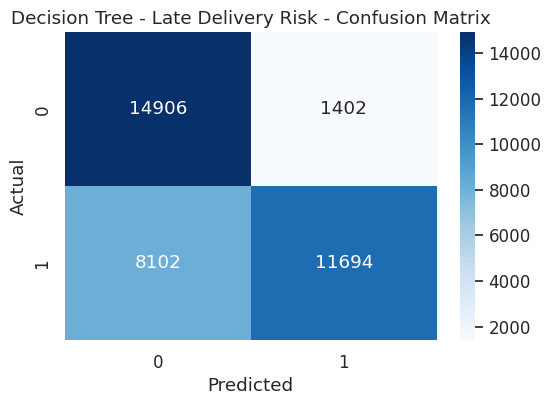

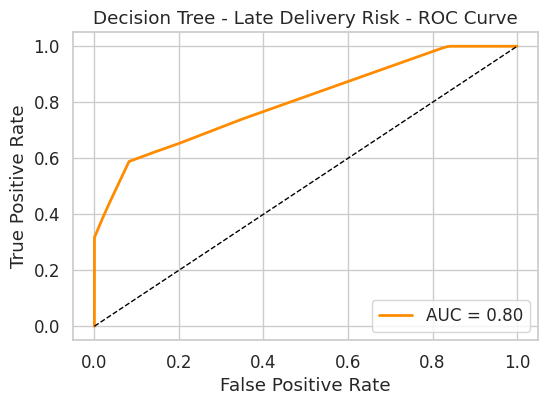

ROC-AUC Score: 0.80


In [ ]:
dt_model = DecisionTreeClassifier(
    max_depth=8,      # limit depth to reduce overfitting
    random_state=42
)

dt_metrics = evaluate_classifier(
    dt_model, X_train_lr, X_test_lr, y_train_lr, y_test_lr,
    model_name="Decision Tree - Late Delivery Risk"
)

=== Decision Tree - Delivery Status Evaluation ===
Accuracy: 62.37%
Recall: 62.83%
F1 Score: 61.85%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.15      0.25      6439
           1       0.41      0.61      0.49      8318
           2       0.71      0.75      0.73     19796
           3       1.00      1.00      1.00      1551

    accuracy                           0.62     36104
   macro avg       0.77      0.63      0.62     36104
weighted avg       0.70      0.62      0.60     36104



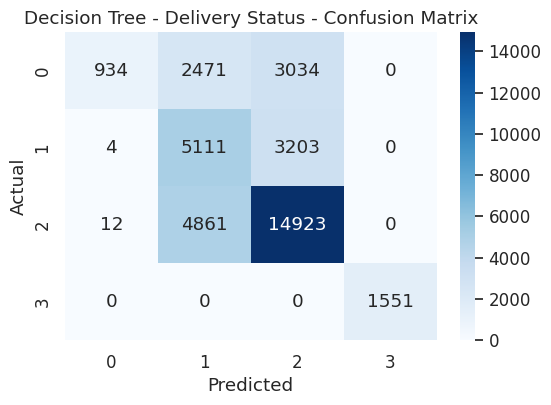

In [ ]:
# Initialize Decision Tree for Delivery Status
dt_model_ds = DecisionTreeClassifier(
    max_depth=8,       # limit depth to reduce overfitting
    random_state=42
)

# Evaluate the model on Delivery Status
dt_metrics_ds = evaluate_classifier(
    dt_model_ds,
    X_train_ds,
    X_test_ds,
    y_train_ds,
    y_test_ds,
    model_name="Decision Tree - Delivery Status"
)

### **KNN**

=== KNN - Late Delivery Risk Evaluation ===
Accuracy: 66.26%
Recall: 68.97%
F1 Score: 69.16%

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.63      0.63     16308
           1       0.69      0.69      0.69     19796

    accuracy                           0.66     36104
   macro avg       0.66      0.66      0.66     36104
weighted avg       0.66      0.66      0.66     36104



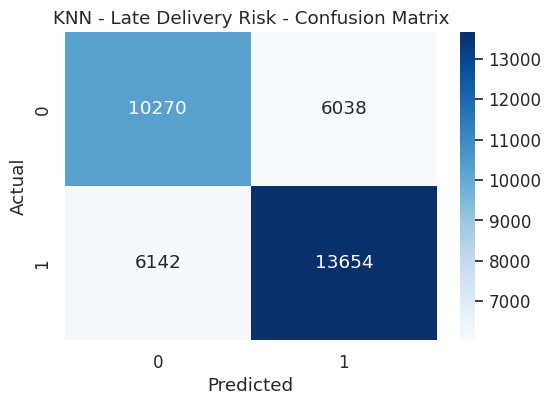

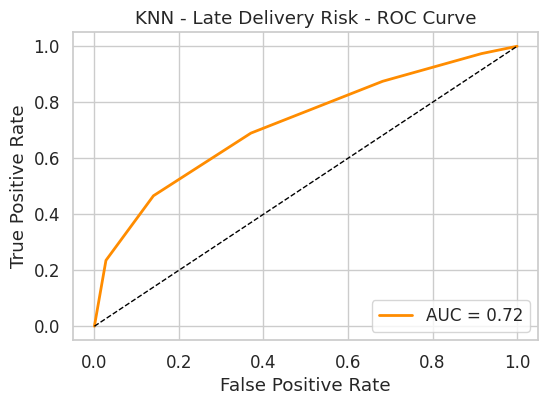

ROC-AUC Score: 0.72


In [ ]:
# Initialize KNN classifier
knn_model = KNeighborsClassifier(
    n_neighbors=5,       # number of neighbors
    weights='uniform',   # all neighbors have equal weight
    metric='minkowski',  # Euclidean distance
    p=2
)

# Evaluate KNN on Late_delivery_risk
knn_metrics = evaluate_classifier(
    knn_model,
    X_train_lr_scaled,
    X_test_lr_scaled,
    y_train_lr,
    y_test_lr,
    model_name="KNN - Late Delivery Risk"
)

=== KNN - Delivery Status Evaluation ===
Accuracy: 55.14%
Recall: 40.93%
F1 Score: 42.99%

Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.27      0.28      6439
           1       0.42      0.50      0.45      8318
           2       0.68      0.70      0.69     19796
           3       0.87      0.17      0.29      1551

    accuracy                           0.55     36104
   macro avg       0.57      0.41      0.43     36104
weighted avg       0.56      0.55      0.55     36104



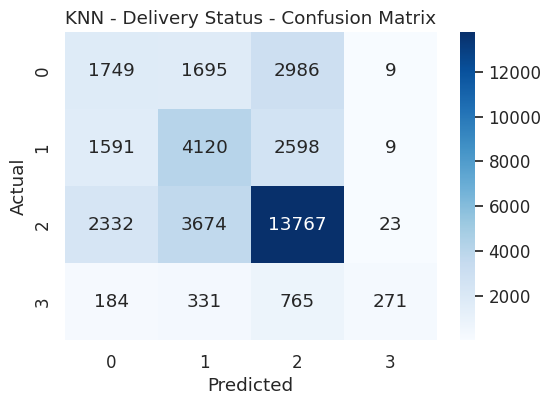

In [ ]:
# Initialize KNN for Delivery Status
knn_model_ds = KNeighborsClassifier(
    n_neighbors=5,       # number of neighbors
    weights='uniform',   # equal weight to all neighbors
    metric='minkowski',  # Euclidean distance
    p=2
)

# Evaluate KNN on Delivery Status
knn_metrics_ds = evaluate_classifier(
    knn_model_ds,
    X_train_ds_scaled,
    X_test_ds_scaled,
    y_train_ds,
    y_test_ds,
    model_name="KNN - Delivery Status"
)

## **Compare Models**

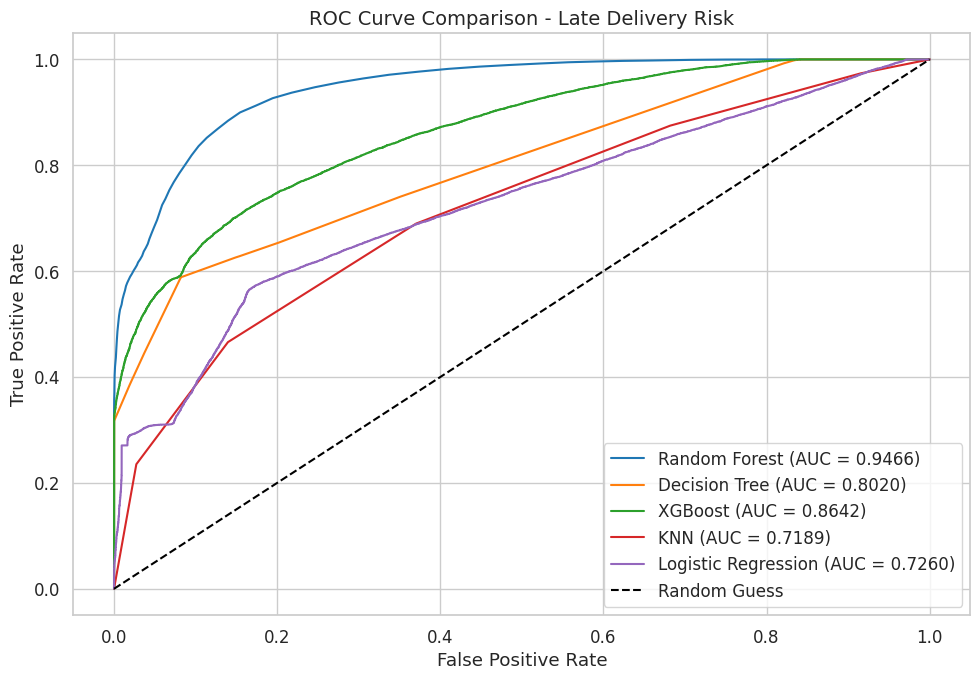

In [ ]:
# --- Access predicted probabilities from metrics dictionaries ---
y_pred_proba_rf = rf_metrics['y_pred_proba']
y_pred_proba_dt = dt_metrics['y_pred_proba']
y_pred_proba_xgb = xgb_metrics['y_pred_proba']
y_pred_proba_knn = knn_metrics['y_pred_proba']
y_pred_proba_log = log_metrics['y_pred_proba']

# --- ROC-AUC scores ---
roc_auc_rf = rf_metrics['roc_auc']
roc_auc_dt = dt_metrics['roc_auc']
roc_auc_xgb = xgb_metrics['roc_auc']
roc_auc_knn = knn_metrics['roc_auc']
roc_auc_log = log_metrics['roc_auc']

# --- Compute ROC curves ---
fpr_rf, tpr_rf, _ = roc_curve(y_test_lr, y_pred_proba_rf)
fpr_dt, tpr_dt, _ = roc_curve(y_test_lr, y_pred_proba_dt)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_lr, y_pred_proba_xgb)
fpr_knn, tpr_knn, _ = roc_curve(y_test_lr, y_pred_proba_knn)
fpr_log, tpr_log, _ = roc_curve(y_test_lr, y_pred_proba_log)

# --- Plot all ROC curves ---
plt.figure(figsize=(10, 7))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.4f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.4f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.4f})')
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.4f})')

# Diagonal line for random chance
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Labels and formatting
plt.title('ROC Curve Comparison - Late Delivery Risk', fontsize=14)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
def summarize_models(metrics_list, model_names):
    """
    Create a summary table for multiple models with Accuracy, ROC-AUC, F1, and Recall.

    Parameters:
    - metrics_list: list of evaluation dictionaries from evaluate_classifier
    - model_names: list of model names (same order as metrics_list)

    Returns:
    - styled pandas DataFrame
    """
    df = pd.DataFrame({
        'Model': model_names,
        'Accuracy': [m['accuracy'] for m in metrics_list],
        'ROC-AUC': [m['roc_auc'] for m in metrics_list],
        'F1 Score': [m['f1_score'] for m in metrics_list],
        'Recall': [m['recall'] for m in metrics_list]
    })

    return df.style.background_gradient(cmap='YlGn', subset=['Accuracy', 'ROC-AUC', 'F1 Score', 'Recall'])

# Example usage
metrics_list = [rf_metrics, dt_metrics, log_metrics, xgb_metrics, knn_metrics]
model_names = ['Random Forest', 'Decision Tree', 'Logistic Regression', 'XGBoost', 'KNN']

summary_table = summarize_models(metrics_list, model_names)
summary_table

This table compares five different classification models (Random Forest, Decision Tree, Logistic Regression, XGBoost, and KNN) based on four key evaluation metrics: **Model Accuracy**, **ROC-AUC**, **F1 Score**, and **Recall**.

1. Overall Best Performer: Random Forest

The **Random Forest** model demonstrates the best performance across the board:

* **Highest Accuracy:** **0.845890** (or approximately $84.6\%$).
* **Highest ROC-AUC:** **0.946617**. The ROC-AUC score, being close to 1, indicates excellent separability and a high degree of confidence in distinguishing between the two classes.
* **Highest F1 Score:** **0.848136**. This metric, which is the harmonic mean of precision and recall, suggests the model achieves the best balance between correctly identifying positive cases and not making too many false alarms.
* **Highest Recall:** **0.784856**. This is a measure of how many of the actual positive cases the model correctly identified.

2. Second Best Performer: XGBoost

The **XGBoost** model is the second strongest performer, particularly on the combined metrics:

* **Accuracy:** $0.754709$ (Second highest).
* **ROC-AUC:** $0.864152$ (Second highest).
* **F1 Score:** $0.739468$ (Second highest).

3. Lowest Performers: Logistic Regression and KNN

The **Logistic Regression** and **K-Nearest Neighbors (KNN)** models show the lowest performance across the metrics.

* **Lowest Accuracy:** **KNN** at $0.662641$.
* **Best Recall (among the lower-performing models):** The **KNN** model achieved a high recall of **$0.689735$** relative to its accuracy and F1 score, suggesting it is relatively better at finding all positive cases, though perhaps at the cost of precision (implied by the lower F1 score).

## **Feature Importance and Explainability**

### **Random Forest Feature Importance**

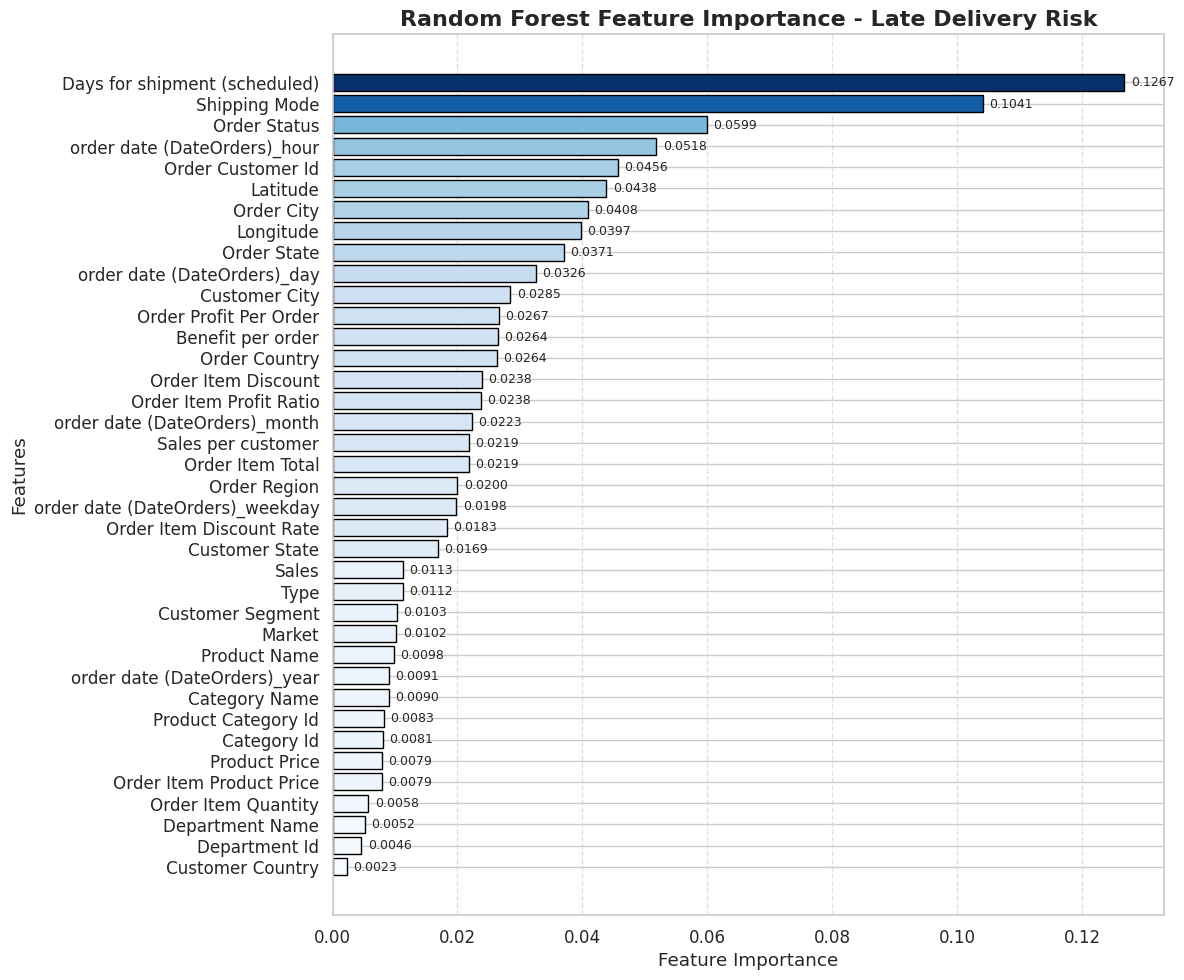

In [ ]:
# Create a DataFrame with features and their importance
feature_importances = pd.DataFrame({
    'Feature': X_train_lr.columns,
    'Importance': rf_model.feature_importances_
})

# Sort features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=True).reset_index(drop=True)

# Normalize importance values for color mapping
norm = plt.Normalize(feature_importances['Importance'].min(), feature_importances['Importance'].max())
colors = plt.cm.Blues(norm(feature_importances['Importance'].values))

# Plot horizontal bar chart
plt.figure(figsize=(12, 10))
bars = plt.barh(feature_importances['Feature'], feature_importances['Importance'], color=colors, edgecolor='black')

# Annotate bars with importance values
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2,
             f'{width:.4f}', va='center', fontsize=9)

# Titles and labels
plt.title('Random Forest Feature Importance - Late Delivery Risk', fontsize=16, fontweight='bold')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

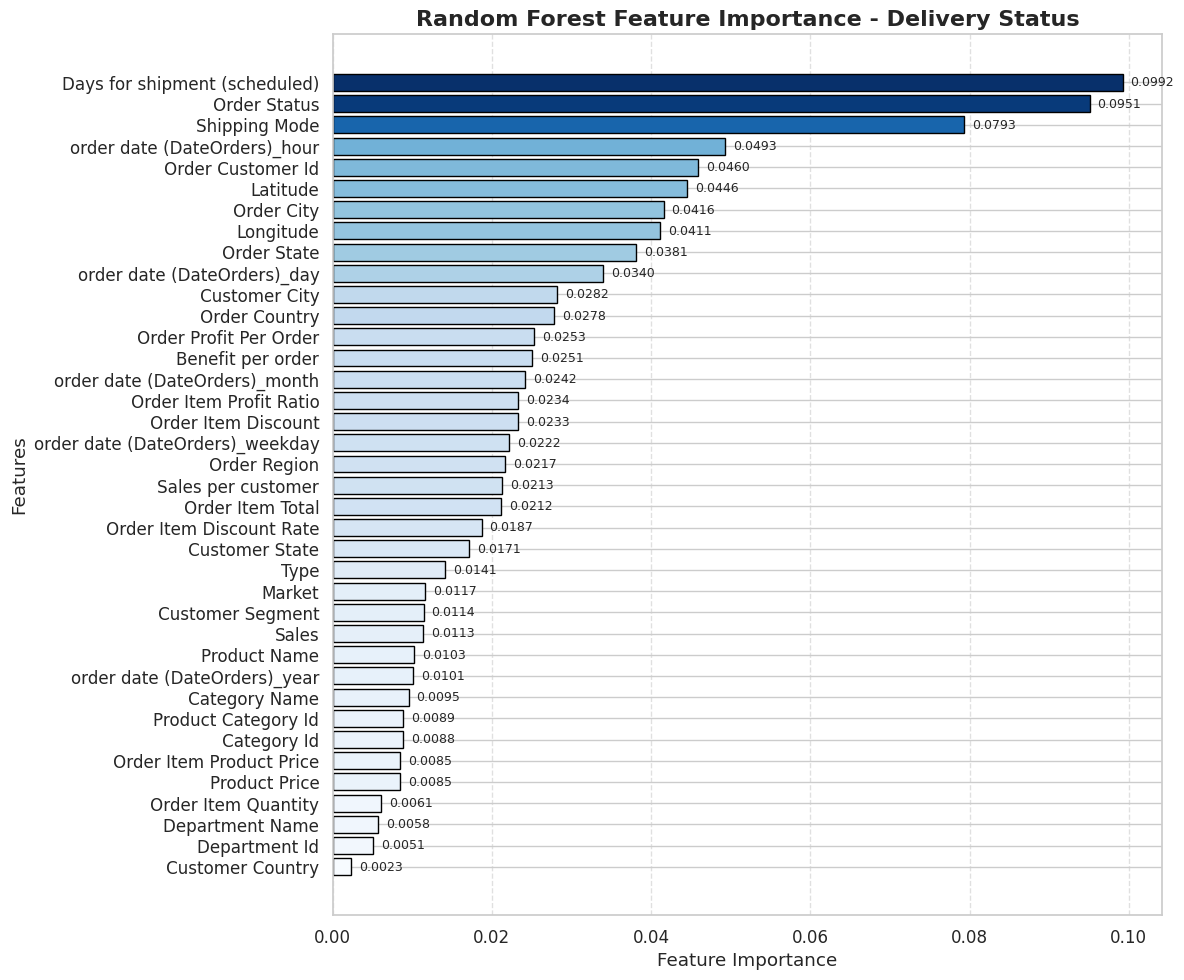

In [ ]:
# Create a DataFrame with features and their importance
feature_importances_ds = pd.DataFrame({
    'Feature': X_train_ds.columns,
    'Importance': rf_model_ds.feature_importances_
})

# Sort features by importance
feature_importances_ds = feature_importances_ds.sort_values(by='Importance', ascending=True).reset_index(drop=True)

# Normalize importance values for color mapping
norm = plt.Normalize(feature_importances_ds['Importance'].min(), feature_importances_ds['Importance'].max())
colors = plt.cm.Blues(norm(feature_importances_ds['Importance'].values))

# Plot horizontal bar chart
plt.figure(figsize=(12, 10))
bars = plt.barh(feature_importances_ds['Feature'], feature_importances_ds['Importance'], color=colors, edgecolor='black')

# Annotate bars with importance values
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2,
             f'{width:.4f}', va='center', fontsize=9)

# Titles and labels
plt.title('Random Forest Feature Importance - Delivery Status', fontsize=16, fontweight='bold')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### **LIME**

**How LIME Works (The Process)**

LIME operates on the principle that while a global model may be too complex to understand, its behavior in a small region around a specific data point is often simple enough to approximate.

*1. Select a Prediction*

LIME begins by choosing a single instance (a data point) whose prediction you want to explain.

*2. Generate a Local Dataset*

LIME generates a new, synthetic dataset by **perturbing** (modifying) the features of the original instance. For example, if explaining a house price prediction, LIME might slightly change the number of rooms, the square footage, and the neighborhood to create many new, similar-looking "fake" houses.

*3. Get Model Predictions*

The original, complex model (e.g., a deep neural network or an XGBoost model) is used to predict the outcome for every single one of these new, perturbed instances.

*4. Weigh the Samples*

LIME calculates how close each synthetic instance is to the original instance. Instances that are very close get a **higher weight**, as they better represent the local decision boundary. Instances far away get a lower weight.

*5. Train an Interpretable Model*

LIME then trains a simple, "interpretable" model (like a weighted linear regression) using the synthetic data, their complex model predictions, and their weights. Because the simple model is trained only on the local area and weighted heavily toward the original point, it becomes a **local surrogate** for the complex model.

*6. Generate the Explanation*

The coefficients of this simple, local model are used to explain the prediction.

* A **large positive coefficient** for a feature means that feature strongly pushed the prediction towards the positive class (e.g., "high value" strongly predicts high price).
* A **large negative coefficient** means it strongly pushed the prediction towards the negative class.

The final output is a visualization (like the bar plot you saw previously) showing the top features that contributed to that single prediction.

*Key Concepts*

* **Local Fidelity:** LIME focuses on being faithful to the complex model's behavior *only* in the local vicinity of the prediction, which is often sufficient for humans to gain trust in a single decision.
* **Model-Agnostic:** LIME can be applied to **any** black-box model (hence "Model-agnostic") because it only requires access to the model's inputs and outputs (predictions), not its internal structure.

In [ ]:
# Define the explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_lr.values,          # training features
    feature_names=X_train_lr.columns,         # feature names
    class_names=['No Late Delivery', 'Late Delivery'],  # for binary classification
    mode='classification',
    discretize_continuous=True
)

# Pick an instance to explain (e.g., first row of test set)
i = 0
instance = X_test_lr.iloc[i].values

# Generate explanation
exp = explainer.explain_instance(
    data_row=instance,
    predict_fn=rf_model.predict_proba,   # model's predict_proba
    num_features=10                      # top 10 features
)

# Show explanation in notebook
exp.show_in_notebook(show_table=True)

**LIME Analysis for Single Prediction**

The LIME plot highlights the features that pushed the model toward its final prediction for a specific instance.

1. Prediction Summary

| Prediction | Probability |
| :--- | :--- |
| **No Late Delivery** | **0.82** |
| Late Delivery | 0.18 |

The model is highly confident that this order will **not** be late.

2. Feature Values for the Prediction Instance

The features that define this specific order are shown on the right (with integer values likely representing categorical encodings):

| Feature | Value | Interpretation (Based on typical supply chain data) |
| :--- | :--- | :--- |
| **Days for shipment (scheduled)** | 4.00 | Shipment is scheduled for 4 days. |
| **Shipping Mode** | 3.00 | (Likely Standard or Second Class) |
| **Type** | 1.00 | (Likely a specific order type) |
| **Order Status** | 0.00 | (Likely a status indicating preparation or early stage) |
| **order date (DateOrders)_hour** | 18.00 | Order placed at 6 PM. |
| **Order Customer Id** | 8489.00 | Unique customer ID. |
| **Order State** | 188.00 | (Likely a specific geographic region) |
| **Customer Segment** | 1.00 | (Likely Consumer, as seen in previous plots) |
| **Sales** | 199.99 | Low to mid-value sale. |
| **order date (DateOrders)\_day** | 17.00 | Order placed on the 17th day of the month. |

3. Feature Contributions to the Prediction

The bar chart (or force plot) on the left shows the contribution of the features to the final prediction.

Features Pushing Towards "No Late Delivery" (Blue Bars)

The strongest factors suggesting the order will be **on time** are related to the scheduled time and shipping mode:

* **Days for shipment (scheduled) > 4.00:** The most influential feature, suggesting that having **4 or more scheduled days** provides a significant buffer for on-time delivery.
* **Shipping Mode $\le 3.00$:** This condition (where the Shipping Mode is 3 or less) also strongly suggests the order will be on time.

Features Pushing Towards "Late Delivery" (Orange Bars)

Factors that slightly increase the risk of **late delivery** include:

* **Type $\le 1.00$:** The order's Type (likely 1.00 for this instance) has the largest influence towards lateness, though its impact (0.06) is much smaller than the "on time" factors.
* **Order Status $\le 2.00$:** An order status of 2 or less also pushes the prediction slightly toward lateness.
* **Order date (DateOrders)\_hour = 18.00:** Placing the order at $6 \text{ PM}$ contributes a small push toward lateness.

### **SHAP**

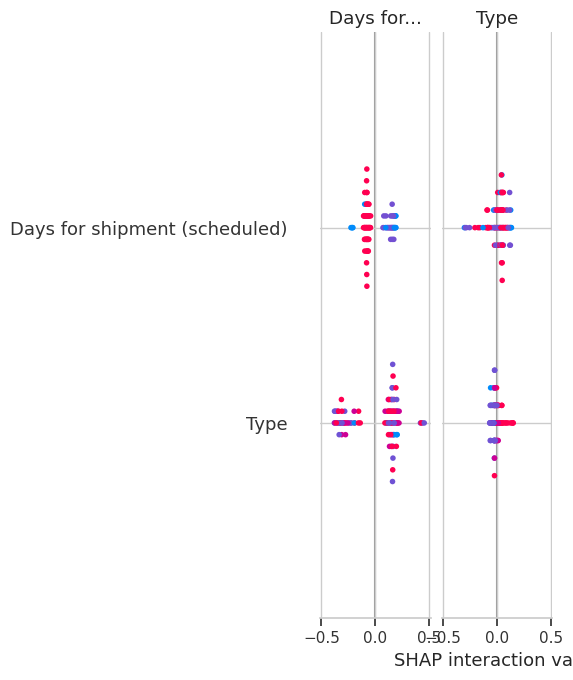

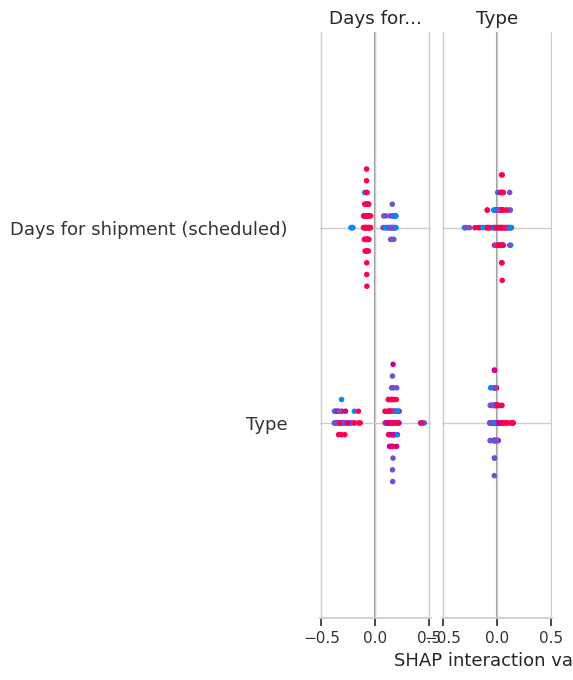

In [ ]:
# Create the explainer
explainer = shap.TreeExplainer(rf_model)

# Sample a few rows for speed
X_sample = X_train_lr.sample(100, random_state=42)

# Compute SHAP values
shap_values = explainer.shap_values(X_sample)

# Bar plot of feature importance (fast)
shap.summary_plot(shap_values, X_sample, plot_type="bar")

# Dot/beeswarm plot (shows individual contributions)
shap.summary_plot(shap_values, X_sample, plot_type="dot")

**SHAP Interaction Analysis**

This plot is a matrix where the main diagonal (top-left to bottom-right) would typically show the main effect of a feature, and the off-diagonal cells show the interaction effect. The plot you provided focuses solely on the **off-diagonal interaction effects** between the two features.

1. Structure and Interpretation

* **X-Axis (SHAP Interaction Value):** This represents the magnitude of the interactive effect.
    * Values **> 0** (right of the center line) push the model towards the **positive class** (likely **Late Delivery**, based on the general context of your modeling).
    * Values **< 0** (left of the center line) push the model towards the **negative class** (likely **No Late Delivery**).
* **Color (Red/Blue/Purple Dots):** The color of each dot indicates the magnitude of the **interacting feature's value**.
    * **Red/Darker Color:** Represents a **high value** of the interacting feature.
    * **Blue/Lighter Color:** Represents a **low value** of the interacting feature.

2. Interaction Effect: Days for Shipment (Scheduled) and Type

The plot shows two symmetrical views of the same interaction:

A. Influence of Scheduled Days on Type's Effect (Top-Right Panel)

This panel shows how the value of **Days for shipment (scheduled)** affects the model's reliance on the **Type** feature.

* **High Scheduled Days (Red Dots):** When a high number of days are scheduled, the points are clustered near the center ($0.00$), meaning the model's reliance on the 'Type' feature for prediction is **minimized**. The large time buffer makes the order type less relevant for predicting lateness.
* **Low Scheduled Days (Blue Dots):** When a low number of days are scheduled, the points show a wider spread with some pushing **negatively** (towards 'No Late Delivery') and some pushing **positively** (towards 'Late Delivery'). This suggests that with a tight deadline, the specific **Order Type becomes more influential** in determining the risk.

B. Influence of Type on Scheduled Days' Effect (Bottom-Left Panel)

This panel shows how the value of **Type** affects the model's reliance on the **Days for shipment (scheduled)** feature.

* **High Type Value (Red Dots):** When the 'Type' feature has a high value, the interaction effect tends to push **positively** (towards 'Late Delivery').
* **Low Type Value (Blue Dots):** When the 'Type' feature has a low value, the interaction effect tends to push **negatively** (towards 'No Late Delivery'). This confirms that **low values of 'Type' combined with 'Days for shipment (scheduled)'** create a significant **reduction** in late delivery risk.

### **DICE**

In [ ]:
df['Late_delivery_risk'] = df['Late_delivery_risk'].map({
    'No Late Delivery': 0,
    'Late Delivery': 1
})

In [65]:
df_dice = df.drop(columns=['Delivery Status'])

# Prepare data for DiCE
d = dice_ml.Data(dataframe=df_dice,
                 continuous_features=['Sales', 'Order Item Quantity', 'Days for shipment (scheduled)'],
                 outcome_name='Late_delivery_risk')

# Use your trained Random Forest
m = dice_ml.Model(model=rf_model, backend="sklearn")

# Initialize DiCE explainer
exp = Dice(d, m, method="random")

# Pick one instance from test set
query_instance = X_test_lr.iloc[0:1]

# Generate counterfactuals (target outcome = 0 "No Late Delivery")
cf = exp.generate_counterfactuals(query_instance, total_CFs=3, desired_class="opposite")

# Show results
cf.visualize_as_dataframe()

100%|██████████| 1/1 [00:01<00:00,  1.08s/it]

Query instance (original outcome : 0)


Type  Days for shipment (scheduled)  Benefit per order  Sales per customer  \
0     0                              4              100.0          199.990005   

   Category Id  Category Name  Customer City  Customer Country  \
0           48             46            184                 0   

   Customer Segment  Customer State  Department Id  Department Name  \
0                 1               5              7                3   

    Latitude  Longitude  Market  Order City  Order Country  Order Customer Id  \
0  37.013351 -121.57859       4        2806             48               8489   

   Order Item Discount  Order Item Discount Rate  Order Item Product Price  \
0                  0.0                       0.0                199.990005   

   Order Item Profit Ratio  Order Item Quantity       Sales  Order Item Total  \
0                      0.5                    1  199.990005        199.990005   

   Order Profit Per Order  Order Region  Order State  Order Status  \
0                   100.0            21          188             1   

   Product Category Id  Product Name  Product Price  Shipping Mode  \
0                   48            70     199.990005              3   

   order date (DateOrders)_year  order date (DateOrders)_month  \
0                          2016                              8   

   order date (DateOrders)_day  order date (DateOrders)_weekday  \
0                           17                                2   

   order date (DateOrders)_hour  Late_delivery_risk  
0                            18                   0


Diverse Counterfactual set (new outcome: 1)


Type  Days for shipment (scheduled)  Benefit per order  Sales per customer  \
0     0                              3              100.0          199.990005   
1     0                              4              100.0          199.990005   
2     0                              0              100.0          199.990005   

   Category Id  Category Name  Customer City  Customer Country  \
0           48             46            184                 0   
1           48             46            184                 0   
2           73             46            184                 0   

   Customer Segment  Customer State  Department Id  Department Name  \
0                 1               5              7                3   
1                 1               5              7                3   
2                 1               5              7                3   

    Latitude  Longitude  Market  Order City  Order Country  Order Customer Id  \
0  37.013351 -121.57859       4        2806             48               8489   
1  18.234236 -121.57859       4        2806             48               8489   
2  37.013351 -121.57859       4        2806             48               8489   

   Order Item Discount  Order Item Discount Rate  Order Item Product Price  \
0                  0.0                       0.0                199.990005   
1                  0.0                       0.0                199.990005   
2                  0.0                       0.0                199.990005   

   Order Item Profit Ratio  Order Item Quantity       Sales  Order Item Total  \
0                      0.5                    1  199.990005        199.990005   
1                      0.5                    1  199.990005        199.990005   
2                      0.5                    1  199.990005        199.990005   

   Order Profit Per Order  Order Region  Order State  Order Status  \
0                   100.0            21          283             1   
1                   100.0            21          188             1   
2                   100.0            21          188             1   

   Product Category Id  Product Name  Product Price  Shipping Mode  \
0                   48            70     199.990005              3   
1                   48            70     199.990005              0   
2                   48            70     199.990005              3   

   order date (DateOrders)_year  order date (DateOrders)_month  \
0                          2016                              8   
1                          2016                              8   
2                          2016                              8   

   order date (DateOrders)_day  order date (DateOrders)_weekday  \
0                           17                                2   
1                           17                                2   
2                           17                                2   

   order date (DateOrders)_hour  Late_delivery_risk  
0                            18                   0  
1                            18                   1  
2                            18                   1

**Diverse Counterfactual Explanations (DiCE) Analysis**

The goal of the analysis is to understand the minimal and diverse changes required to flip the prediction of an order from **Factual Outcome 0** (Likely **No Late Delivery Risk**) to **New Outcome 1** (Likely **Late Delivery Risk**).

- **Factual Instance Analysis:**

The original instance (Outcome 0) represents an order predicted to **Not be a Late Delivery Risk**.

| Feature Segment | Inferred Factual Value | Interpretation |
| :--- | :--- | :--- |
| **Days for shipment (scheduled)** | 4 | A standard, possibly 4-day shipping schedule. |
| **Latitude** | $\approx 37.0$ | A specific, likely US West Coast/Central, shipping location. |
| **Order/Customer Identifier** | Starts with 4846... | Associated with a specific, reliable customer or department segment. |
| **Target Variable** | **0** | **Prediction: No Late Delivery Risk** |


- **Diverse Counterfactual Paths (New Outcome: 1 - Late Delivery Risk):**

The three diverse counterfactuals suggest three different, independent ways to achieve a "Late Delivery Risk" prediction.

- Counterfactual 1: Time Constraint (The Minimal Change):

This path suggests that a change in the delivery schedule or a timing-related event is sufficient to flip the prediction.

| Feature Segment | Factual Value (0) | Counterfactual Value (1) | Interpretation |
| :--- | :--- | :--- | :--- |
| **Days for shipment (scheduled)** | **4** | **3** | The **most impactful change** is reducing the scheduled delivery time by one day. |
| **Order Date (Time segment)** | Ends with 1188... | Ends with 1283... | A small change in the ordering time (e.g., placing the order one hour later) combined with the shorter schedule. |
| **Target Variable** | **0** | **1** | **Conclusion:** *An aggressive reduction in scheduled delivery time significantly increases the late delivery risk.* |

- Counterfactual 2: Geographic Constraint:

This path suggests that the geographic origin of the order is the critical factor.

| Feature Segment | Factual Value (0) | Counterfactual Value (1) | Interpretation |
| :--- | :--- | :--- | :--- |
| **Latitude** | $\approx 37.0$ | $\approx 18.2$ | A **massive change** in location (e.g., switching from a mainland US city to a remote island or a location much further south/equatorially). |
| **Other Logistics/Date** | Ends with ...**3**2016... | Ends with ...**0**2016... | A change in the initial portion of the logistics sequence (e.g., Shipping Mode changing from 3 to 0). |
| **Target Variable** | **0** | **1** | **Conclusion:** *Processing an order from a significantly different or distant geographic region (with non-standard logistics setup) is highly predictive of a late delivery risk.* |

- Counterfactual 3: Segmentation Constraint:

This path suggests that the type of customer or the department handling the order is the reason for the increased risk.

| Feature Segment | Factual Value (0) | Counterfactual Value (1) | Interpretation |
| :--- | :--- | :--- | :--- |
| **Customer/Department ID** | Starts with **48**46... | Starts with **73**46... | A change in the customer segment or internal department responsible for the order (e.g., shifting from Segment 48 to Segment 73). |
| **Days for shipment (scheduled)** | 4 | 0 (Inferred from 2**0**0...) | Coupled with the segment change, the order is tagged with 0 days for shipment (possibly meaning immediate/same-day dispatch). |
| **Target Variable** | **0** | **1** | **Conclusion:** *Orders originating from a specific, riskier customer or department segment, especially those requiring immediate/zero-day dispatch, are prone to late delivery.*



- **Summary of Causal Factors:**

Based on the three diverse counterfactuals, the model predicts a Late Delivery Risk (Outcome 1) when:

1.  **Time Constraint:** The scheduled delivery window is made too tight (e.g., $4 \rightarrow 3$ days), suggesting the current system is operating near its capacity limit.
2.  **Geographic Distance:** The order originates from a significantly non-standard or distant $\text{Latitude}$ ($\approx 37^{\circ} \rightarrow \approx 18^{\circ}$), indicating logistical complexity.
3.  **Segment/Urgency:** The order comes from a problematic customer or department segment and requires unrealistic delivery speed (e.g., $4 \rightarrow 0$ days scheduled).